# Imports

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak 
import math
import numpy.ma as ma
import matplotlib.cm as cm
import astropy.coordinates as coord
import astropy.units as u

In [17]:
from astropy.io import fits
from astropy.table import Table
from scipy.optimize import curve_fit
from statistics import mean
from astropy.io import ascii

# Data 

In [18]:
table = Table.read("C:\Aramaki Lab Research\MeV Gamma Ray Science\MeV Skymap Code\gll_psc_v22.fit")

In [19]:
table1 = Table.read("C:\Aramaki Lab Research\MeV Gamma Ray Science\MeV Skymap Code\BAT_105m_catalog_SED.fits")

In [20]:
FLE = Table.read("C:\Aramaki Lab Research\MeV Gamma Ray Science\MeV Skymap Code\J_A+A_618_A22_catalog.dat.fits")
bright_FLE = FLE[np.argsort(FLE['EF30-100'])]

# 3C 273

In [21]:
fermi_obj_name = table['ASSOC1']
objname_fermi = '3C 273                      ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J1229.0+0202,187.2675,2.0454,289.9305,64.3510,0.0090,0.0088,88.230,0.0146,0.0143,88.230,1208,,135.872,279.05,6.2881e-09,1.4483e-10,1.2873e-10,1.5582e-12,LogParabola,3.6662e-10,4.4482e-12,2.7049,0.0109,3.9371e-10,5.4815e-12,2.6083,0.0156,0.0917,0.0093,8.696,3.8336e-10,5.0600e-12,2.4512,0.0291,0.00511,0.00057,0.6667,--,8.878,15287.06,6.1187336e-07 .. 3.3676237e-12,-3.736698e-08 .. 4.8877387e-12,9.664999e-11 .. 1.10055973e-13,18.304876 .. 1.9060148,6361.0679,0.9583,0.2563,125.509,1.0176407e-06,1.35996805e-08,286670016.0,31560000.0,4.975151e-07 .. 2.9988996e-07,-8.881011e-09 .. 8.9901055e-09,86.491905 .. 48.23688,12153.2773,1.1640,0.1204,99.685,2.0882555e-06,3.5279548e-08,273520000.0,5260000.0,6.503525e-07 .. 1.6970517e-07,-2.0927224e-08 .. 1.7773973e-08,47.125755 .. 12.778085,3FGL J1229.1+0202,3FHL J1229.2+0201,J1228+0154,3EG J1229+0210,EGR J1229+0203,N,,FSRQ,,3C 273,,1.0000,0.9998,187.2779,2.0524,0.00000,0


In [22]:
Obj_3C273_spectra_fermi = []

for gal in table[wg3]:
    Obj_3C273_spectra_fermi.extend(gal['nuFnu_Band'])

#print(Obj_3C111_spectra_fermi)

Obj_3C273_spectra_fermi = [i * (624151) for i in Obj_3C273_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_3C273_spectra_fermi)

Obj_3C273_spectra_fermi_yerrmin = [3.683985674416204e-06, 8.442139870464601e-07, 3.4609076218712663e-07, 2.422386578232016e-07, 1.908510182080077e-07, 1.4144101766306e-07, 5.172677499143576e-08]
Obj_3C273_spectra_fermi_yerrmax = [3.683985674416204e-06, 8.442139870464601e-07, 3.4609076218712663e-07, 2.422386578232016e-07, 1.908510182080077e-07, 1.7405769924002767e-07, 9.969828917995142e-08]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[6.032418580202009e-05, 3.9444581008567237e-05, 1.9985055935031054e-05, 7.876183412333475e-06, 2.1914352220642457e-06, 4.573640122290906e-07, 6.869154585044396e-08]


In [23]:
obj_name = table1['COUNTERPART_NAME']
name = '3C 273'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
619,SWIFT J1229.1+0202,187.276,2.047,197.62,3C 273,0.0,187.2779,2.0524,421.57,418.49,424.66,0.0,1.75,1.73,1.77,0.70,0.1583,46.46,0.0,80,Beamed AGN,3.0 .. 22.5,0.000884711219 .. 0.0188428052,0.0735220909 .. 0.15560098


In [24]:
Obj_3C273_spectra_swift = [] 
Obj_3C273_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_3C273_spectra_swift.extend(gal['Flux'])
    Obj_3C273_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_3C273_spectra_swift = [i * (1e-3) for i in Obj_3C273_spectra_swift]
Obj_3C273_spectra_swift_err = [i * (1e-3) for i in Obj_3C273_spectra_swift_err]

print(Obj_3C273_spectra_swift)
print(Obj_3C273_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[7.35220909e-05, 7.88383186e-05, 8.4435761e-05, 9.35884714e-05, 0.000100185104, 0.00011159676300000001, 0.000122341111, 0.00015560098]
[8.84711219e-07, 1.05392095e-06, 8.95128236e-07, 1.02069112e-06, 1.2564923400000001e-06, 2.2350503100000004e-06, 4.18877369e-06, 1.88428052e-05]


In [25]:
Obj_3C273_COMPTEL_PhotonFlux_075_1MEV3 = 8.5 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_1_3MEV3 = 14.5 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_3_10MEV3 = 3.9  * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_10_30MEV3 = 0.6 * (1e-5)

Obj_3C273_COMPTEL_EnergyFlux_075_1MEV3 = math.sqrt(0.75) * Obj_3C273_COMPTEL_PhotonFlux_075_1MEV3
Obj_3C273_COMPTEL_EnergyFlux_1_3MEV3 = math.sqrt(3) * Obj_3C273_COMPTEL_PhotonFlux_1_3MEV3
Obj_3C273_COMPTEL_EnergyFlux_3_10MEV3 = math.sqrt(30) * Obj_3C273_COMPTEL_PhotonFlux_3_10MEV3
Obj_3C273_COMPTEL_EnergyFlux_10_30MEV3 = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV3

Obj_3C273_COMPTEL_PhotonFlux_075_1MEV_err3 = 0 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_1_3MEV_err3 = 2.2 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_3_10MEV_err3 = 0.9 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_10_30MEV_err3 = 0.3 * (1e-5)

Obj_3C273_COMPTEL_EnergyFlux_075_1MEV_err3 = math.sqrt(0.75) * Obj_3C273_COMPTEL_PhotonFlux_075_1MEV_err3
Obj_3C273_COMPTEL_EnergyFlux_1_3MEV_err3 = math.sqrt(3) * Obj_3C273_COMPTEL_PhotonFlux_1_3MEV_err3
Obj_3C273_COMPTEL_EnergyFlux_3_10MEV_err3 = math.sqrt(30) * Obj_3C273_COMPTEL_PhotonFlux_3_10MEV_err3
Obj_3C273_COMPTEL_EnergyFlux_10_30MEV_err3 = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV_err3

COMPTEL_3C273_EnergyBand_UL3 = [math.sqrt(0.75)]
COMPTEL_3C273_EnergyBand3 = [math.sqrt(3), math.sqrt(30), math.sqrt(300)]

COMPTEL_3C273_EnergyFlux_UL3 = [Obj_3C273_COMPTEL_EnergyFlux_075_1MEV3]
COMPTEL_3C273_EnergyFlux_err3 = [Obj_3C273_COMPTEL_PhotonFlux_1_3MEV_err3, Obj_3C273_COMPTEL_PhotonFlux_3_10MEV_err3, Obj_3C273_COMPTEL_PhotonFlux_10_30MEV_err3]
COMPTEL_3C273_EnergyFlux3 = [Obj_3C273_COMPTEL_EnergyFlux_1_3MEV3, Obj_3C273_COMPTEL_EnergyFlux_3_10MEV3, Obj_3C273_COMPTEL_EnergyFlux_10_30MEV3]

In [26]:
Obj_3C273_COMPTEL_PhotonFlux_075_1MEV1 = 13.8 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_1_3MEV1 = 10.7 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_3_10MEV1 = 5.6 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1 = 1.7 * (1e-5)

Obj_3C273_COMPTEL_EnergyFlux_075_1MEV1 = math.sqrt(0.75) * Obj_3C273_COMPTEL_PhotonFlux_075_1MEV1
Obj_3C273_COMPTEL_EnergyFlux_1_3MEV1 = math.sqrt(3) * Obj_3C273_COMPTEL_PhotonFlux_1_3MEV1
Obj_3C273_COMPTEL_EnergyFlux_3_10MEV1 = math.sqrt(30) * Obj_3C273_COMPTEL_PhotonFlux_3_10MEV1
Obj_3C273_COMPTEL_EnergyFlux_10_30MEV1 = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1

Obj_3C273_COMPTEL_PhotonFlux_075_1MEV1_err = 4.8 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_1_3MEV1_err = 3.7 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_3_10MEV1_err = 1.9 * (1e-5)
#Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1_err = 0 * (1e-5)

Obj_3C273_COMPTEL_EnergyFlux_075_1MEV1_err = math.sqrt(0.75) * Obj_3C273_COMPTEL_PhotonFlux_075_1MEV1_err
Obj_3C273_COMPTEL_EnergyFlux_1_3MEV1_err = math.sqrt(3) * Obj_3C273_COMPTEL_PhotonFlux_1_3MEV1_err
Obj_3C273_COMPTEL_EnergyFlux_3_10MEV1_err = math.sqrt(30) * Obj_3C273_COMPTEL_PhotonFlux_3_10MEV1_err
#Obj_3C273_COMPTEL_EnergyFlux_10_30MEV1_err = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1_err

COMPTEL_EnergyBand = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30)]
print(COMPTEL_EnergyBand)

Obj_3C273_COMPTEL_EnergyFlux1 = [Obj_3C273_COMPTEL_EnergyFlux_075_1MEV1, Obj_3C273_COMPTEL_EnergyFlux_1_3MEV1, Obj_3C273_COMPTEL_EnergyFlux_3_10MEV1]
print(Obj_3C273_COMPTEL_EnergyFlux1)

Obj_3C273_COMPTEL_EnergyFlux_err1 = [Obj_3C273_COMPTEL_EnergyFlux_075_1MEV1_err, Obj_3C273_COMPTEL_EnergyFlux_1_3MEV1_err, Obj_3C273_COMPTEL_EnergyFlux_3_10MEV1_err]
print(Obj_3C273_COMPTEL_EnergyFlux_err1)

[0.8660254037844386, 1.7320508075688772, 5.477225575051661]
[0.00011951150572225254, 0.00018532943640986986, 0.00030672463220289304]
[4.1569219381653056e-05, 6.408587988004847e-05, 0.00010406728592598157]


In [27]:
Obj_3C273_COMPTEL_PhotonFlux_075_1MEV2 = 27.6 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_1_3MEV2 = 6.1 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_3_10MEV2 = 1.1 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_10_30MEV2 = 0.08 * (1e-5)

Obj_3C273_COMPTEL_EnergyFlux_075_1MEV2 = math.sqrt(0.75) * Obj_3C273_COMPTEL_PhotonFlux_075_1MEV2
Obj_3C273_COMPTEL_EnergyFlux_1_3MEV2 = math.sqrt(3) * Obj_3C273_COMPTEL_PhotonFlux_1_3MEV2
Obj_3C273_COMPTEL_EnergyFlux_3_10MEV2 = math.sqrt(30) * Obj_3C273_COMPTEL_PhotonFlux_3_10MEV2
Obj_3C273_COMPTEL_EnergyFlux_10_30MEV2 = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV2

Obj_3C273_COMPTEL_PhotonFlux_075_1MEV2_err = 9.6 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_1_3MEV2_err = 2.1 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_3_10MEV2_err = 0.4 * (1e-5)
#Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1_err = 0 * (1e-5)

Obj_3C273_COMPTEL_EnergyFlux_075_1MEV2_err = math.sqrt(0.75) * Obj_3C273_COMPTEL_PhotonFlux_075_1MEV2_err
Obj_3C273_COMPTEL_EnergyFlux_1_3MEV2_err = math.sqrt(3) * Obj_3C273_COMPTEL_PhotonFlux_1_3MEV2_err
Obj_3C273_COMPTEL_EnergyFlux_3_10MEV2_err = math.sqrt(30) * Obj_3C273_COMPTEL_PhotonFlux_3_10MEV2_err
#Obj_3C273_COMPTEL_EnergyFlux_10_30MEV1_err = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1_err

COMPTEL_EnergyBand = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30)]
print(COMPTEL_EnergyBand)

Obj_3C273_COMPTEL_EnergyFlux2 = [Obj_3C273_COMPTEL_EnergyFlux_075_1MEV2, Obj_3C273_COMPTEL_EnergyFlux_1_3MEV2, Obj_3C273_COMPTEL_EnergyFlux_3_10MEV2]
print(Obj_3C273_COMPTEL_EnergyFlux2)

Obj_3C273_COMPTEL_EnergyFlux_err2 = [Obj_3C273_COMPTEL_EnergyFlux_075_1MEV2_err, Obj_3C273_COMPTEL_EnergyFlux_1_3MEV2_err, Obj_3C273_COMPTEL_EnergyFlux_3_10MEV2_err]
print(Obj_3C273_COMPTEL_EnergyFlux_err2)

[0.8660254037844386, 1.7320508075688772, 5.477225575051661]
[0.00023902301144450508, 0.00010565509926170151, 6.024948132556828e-05]
[8.313843876330611e-05, 3.637306695894642e-05, 2.190890230020665e-05]


In [28]:
Energy_Bands = Bat_Energy_BandMeV + COMPTEL_EnergyBand + Fermi_Energy_BandMeV
print(Energy_Bands)

Spectra_3C273 = Obj_3C273_spectra_swift + Obj_3C273_COMPTEL_EnergyFlux1 + Obj_3C273_spectra_fermi
print(Spectra_3C273)

Spectra_3C273_minerr = Obj_3C273_spectra_swift_err + Obj_3C273_COMPTEL_EnergyFlux_err1 + Obj_3C273_spectra_fermi_yerrmin

Spectra_3C273_maxerr = Obj_3C273_spectra_swift_err + Obj_3C273_COMPTEL_EnergyFlux_err1 + Obj_3C273_spectra_fermi_yerrmax

Spectra_3C273_err = [Spectra_3C273_minerr, Spectra_3C273_maxerr]

Upper_lim_3C273 = [(math.sqrt(300),Obj_3C273_COMPTEL_EnergyFlux_10_30MEV1)]

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707, 0.8660254037844386, 1.7320508075688772, 5.477225575051661, 70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[7.35220909e-05, 7.88383186e-05, 8.4435761e-05, 9.35884714e-05, 0.000100185104, 0.00011159676300000001, 0.000122341111, 0.00015560098, 0.00011951150572225254, 0.00018532943640986986, 0.00030672463220289304, 6.032418580202009e-05, 3.9444581008567237e-05, 1.9985055935031054e-05, 7.876183412333475e-06, 2.1914352220642457e-06, 4.573640122290906e-07, 6.869154585044396e-08]


In [29]:
Obj_3C273_spectra_swift_err = [Obj_3C273_spectra_swift_err, Obj_3C273_spectra_swift_err]
Obj_3C273_COMPTEL_EnergyFlux_err1 = [Obj_3C273_COMPTEL_EnergyFlux_err1, Obj_3C273_COMPTEL_EnergyFlux_err1]
Obj_3C273_spectra_fermi_yerr = [Obj_3C273_spectra_fermi_yerrmin, Obj_3C273_spectra_fermi_yerrmax]

In [104]:
FLE_obj_name = bright_FLE['AssocCOMP']
obj_name_COMP = '3C273                  '

wg9 = (obj_name_COMP == FLE_obj_name)
#print(wg9)

bright_FLE[wg9]

Name,RAdeg,DEdeg,GLON,GLAT,ePos,Signi,EF30-100,e_EF30-100,EF100-300,e_EF100-300,F30-100,e_F30-100,F100-300,e_F100-300,Class1,z,Assoc1,Assoc3FGL,AssocCOMP
,deg,deg,deg,deg,deg,,mW / m2,mW / m2,mW / m2,mW / m2,1/cm2/s,1/cm2/s,1/cm2/s,1/cm2/s,,,,,
bytes15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,bytes18,bytes18,bytes23
1FLE J1227+0218,186.971298,2.308913,289.132965,64.547798,0.243569,31.050,6.490310e-11,1.439090e-11,3.745700e-11,1.063370e-11,7.790260e-07,1.727320e-07,2.470080e-07,4.046980e-08,fsrq,0.158000,3FGL J1229.1+0202,3FGL J1229.1+0202,3C273


In [31]:
EFBucket30_100 = []
EFBucket30_100e = []
EFBucket100_300 = []
EFBucket100_300e = []

for gal in bright_FLE[wg9]:
    EFBucket30_100.append(gal['EF30-100'])
    EFBucket30_100e.append(gal['e_EF30-100'])
    EFBucket100_300.append(gal['EF100-300'])
    EFBucket100_300e.append(gal['e_EF100-300'])

print(EFBucket30_100)
print(EFBucket30_100e)
print(EFBucket100_300)
print(EFBucket100_300e)

EF_FLE = EFBucket30_100 + EFBucket100_300
EF_FLEe = EFBucket30_100e + EFBucket100_300e

EF_FLE = [624151 * x for x in EF_FLE]
EF_FLEe = [624151 * x for x in EF_FLEe]


print(EF_FLE)
print(EF_FLEe)

EBucket30_100 = math.sqrt(30*100)
EBucket100_300 = math.sqrt(100*300)

EBuckets = [EBucket30_100, EBucket100_300]
print(EBuckets)

[6.49031e-11]
[1.43909e-11]
[3.7457e-11]
[1.06337e-11]
[4.0509334768099995e-05, 2.3378824007e-05]
[8.982094625899999e-06, 6.6370344887e-06]
[54.772255750516614, 173.20508075688772]


Text(0.5, 1.0, '3C 273')

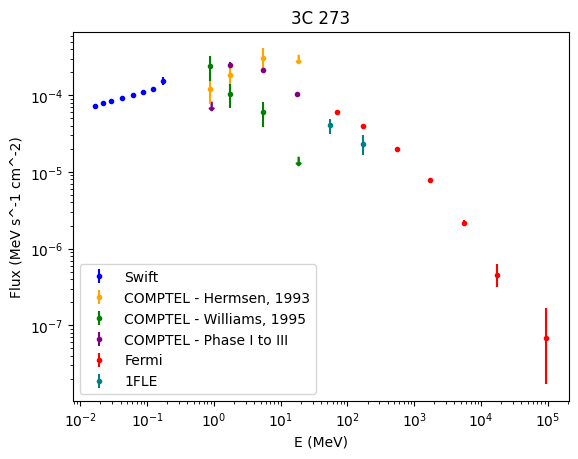

In [32]:
plt.errorbar(Bat_Energy_BandMeV, Obj_3C273_spectra_swift, yerr = Obj_3C273_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(COMPTEL_EnergyBand, Obj_3C273_COMPTEL_EnergyFlux1, yerr = Obj_3C273_COMPTEL_EnergyFlux_err1, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL - Hermsen, 1993')
plt.errorbar(COMPTEL_EnergyBand, Obj_3C273_COMPTEL_EnergyFlux2, yerr = Obj_3C273_COMPTEL_EnergyFlux_err2, fmt = 'o', markersize = 3, color = 'green', label = 'COMPTEL - Williams, 1995')
plt.errorbar(COMPTEL_3C273_EnergyBand3, COMPTEL_3C273_EnergyFlux3, yerr = COMPTEL_3C273_EnergyFlux_err3, fmt = 'o', markersize = 3, color = 'purple', label = 'COMPTEL - Phase I to III')
plt.scatter(math.sqrt(300),Obj_3C273_COMPTEL_EnergyFlux_10_30MEV2, marker = r'$\downarrow$', color = 'green')
plt.scatter(math.sqrt(300),Obj_3C273_COMPTEL_EnergyFlux_10_30MEV1, marker = r'$\downarrow$', color = 'orange')
plt.scatter(math.sqrt(0.75), Obj_3C273_COMPTEL_EnergyFlux_075_1MEV3, marker = r'$\downarrow$', color = 'purple')
plt.errorbar(Fermi_Energy_BandMeV, Obj_3C273_spectra_fermi, yerr = Obj_3C273_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.errorbar(EBuckets, EF_FLE, yerr = EF_FLEe, fmt = 'o', markersize = 3, color = 'teal', label = '1FLE')
plt.legend(loc='lower left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E (MeV)')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('3C 273')

# 3C 279

In [33]:
fermi_obj_name = table['ASSOC1']
objname_fermi = '3C 279                      ' 

wg4 = (fermi_obj_name == objname_fermi)
print(wg4)

table[wg4]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J1256.1-0547,194.0415,-5.7887,305.0952,57.0632,0.0054,0.0054,-80.290,0.0088,0.0088,-80.290,350,,200.439,441.99,2.4531e-08,2.8454e-10,2.7903e-10,2.6584e-12,LogParabola,2.1955e-10,1.8581e-12,2.3381,0.0066,2.3595e-10,2.2839e-12,2.2534,0.0093,0.0699,0.0048,12.667,2.2823e-10,2.0762e-12,2.1557,0.0149,0.00235,0.00018,0.6667,--,12.640,25713.41,5.879691e-07 .. 6.7262994e-11,-3.280813e-08 .. 1.6311114e-11,9.420267e-11 .. 2.5494641e-12,7.1564097 .. 12.653219,5667.2402,0.5543,0.1483,126.090,8.884944e-07,1.1771937e-08,444470016.0,31560000.0,6.327132e-07 .. 3.987742e-07,-9.104593e-09 .. 8.88e-09,115.81551 .. 71.96925,16261.5596,0.9023,0.0933,135.737,2.523134e-06,3.3842028e-08,457620000.0,5260000.0,3.194375e-07 .. 2.8929236e-07,-1.5916243e-08 .. 1.7506382e-08,31.13378 .. 24.628963,3FGL J1256.1-0547,3FHL J1256.1-0547,J1255-0543,3EG J1255-0549,EGR J1256-0552,P,3C 279,FSRQ,,3C 279,,1.0000,1.0000,194.0465,-5.7893,0.00000,0


In [34]:
Obj_3C279_spectra_fermi = []

for gal in table[wg4]:
    Obj_3C279_spectra_fermi.extend(gal['nuFnu_Band'])

#print(Obj_3C111_spectra_fermi)

Obj_3C279_spectra_fermi = [i * (624151) for i in Obj_3C279_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_3C279_spectra_fermi)

Obj_3C279_spectra_fermi_yerrmin = [3.280801068787295e-06, 1.851202804100966e-06, 5.377148153459105e-07, 4.6769907030168095e-07, 5.061720321495916e-07, 5.602445868928751e-07, 3.33107145009321e-07]
Obj_3C279_spectra_fermi_yerrmax = [3.280801068787295e-06, 1.851202804100966e-06, 5.377148153459105e-07, 4.6769907030168095e-07, 5.061720321495916e-07, 5.602445868928751e-07, 3.858744356349483e-07]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[5.879669283001543e-05, 5.39692442235451e-05, 4.3085094015155034e-05, 2.878121231601055e-05, 1.6502839048320242e-05, 6.3296842085771785e-06, 1.5912505749969552e-06]


In [35]:
obj_name = table1['COUNTERPART_NAME']
name = '3C 279'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
645,SWIFT J1256.2-0551,194.053,-5.799,12.29,3C 279,0.0,194.0465,-5.7893,38.82,34.66,42.49,0.0,1.32,1.09,1.54,1.20,0.5362,46.64,0.0,80,Beamed AGN,3.0 .. 22.5,0.00098094705 .. 0.0198482554,0.0032997462 .. -0.00611037342


In [36]:
Obj_3C279_spectra_swift = [] 
Obj_3C279_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_3C279_spectra_swift.extend(gal['Flux'])
    Obj_3C279_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_3C279_spectra_swift = [i * (1e-3) for i in Obj_3C279_spectra_swift]
Obj_3C279_spectra_swift_err = [i * (1e-3) for i in Obj_3C279_spectra_swift_err]

print(Obj_3C279_spectra_swift)
print(Obj_3C279_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[3.2997462000000002e-06, 4.36917087e-06, 6.35640323e-06, 7.06777116e-06, 7.05165602e-06, 1.2285606899999999e-05, 2.02630442e-05, -6.11037342e-06]
[9.8094705e-07, 1.08851376e-06, 9.48345696e-07, 1.0645842400000002e-06, 1.28471444e-06, 2.3395870799999997e-06, 4.34819609e-06, 1.98482554e-05]


In [37]:
Obj_3C279_COMPTEL_PhotonFlux_3_10MEV = 13.8 * (1e-5)
Obj_3C279_COMPTEL_PhotonFlux_10_30MEV = 2.9 * (1e-5)

Obj_3C279_COMPTEL_EnergyFlux_3_10MEV = math.sqrt(30) * Obj_3C279_COMPTEL_PhotonFlux_3_10MEV
Obj_3C279_COMPTEL_EnergyFlux_10_30MEV = math.sqrt(300) * Obj_3C279_COMPTEL_PhotonFlux_10_30MEV


Obj_3C279_COMPTEL_PhotonFlux_3_10MEV_err = 0 * (1e-5)
Obj_3C279_COMPTEL_PhotonFlux_10_30MEV_err = 0.9 * (1e-5)


Obj_3C279_COMPTEL_EnergyFlux_3_10MEV_err = math.sqrt(30) * Obj_3C279_COMPTEL_PhotonFlux_3_10MEV_err
#Obj_3C273_COMPTEL_EnergyFlux_10_30MEV1_err = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1_err

COMPTEL_EnergyBand = [math.sqrt(30)]
print(COMPTEL_EnergyBand)

Obj_3C279_COMPTEL_EnergyFlux = [Obj_3C279_COMPTEL_PhotonFlux_3_10MEV]
print(Obj_3C279_COMPTEL_EnergyFlux)

Obj_3C279_COMPTEL_EnergyFlux_err = [Obj_3C279_COMPTEL_PhotonFlux_10_30MEV_err]
print(Obj_3C279_COMPTEL_EnergyFlux_err)

[5.477225575051661]
[0.00013800000000000002]
[9e-06]


In [38]:
Energy_Bands = Bat_Energy_BandMeV + COMPTEL_EnergyBand + Fermi_Energy_BandMeV
print(Energy_Bands)

Spectra_3C279 = Obj_3C279_spectra_swift + Obj_3C279_COMPTEL_EnergyFlux + Obj_3C279_spectra_fermi
print(Spectra_3C273)

Spectra_3C279_minerr = Obj_3C279_spectra_swift_err + Obj_3C279_COMPTEL_EnergyFlux_err + Obj_3C279_spectra_fermi_yerrmin

Spectra_3C279_maxerr = Obj_3C279_spectra_swift_err + Obj_3C279_COMPTEL_EnergyFlux_err + Obj_3C279_spectra_fermi_yerrmax

Obj_3C279_spectra_fermi_yerr = [Obj_3C279_spectra_fermi_yerrmin, Obj_3C279_spectra_fermi_yerrmax]

Spectra_3C279_err = [Spectra_3C279_minerr, Spectra_3C279_maxerr]

Upper_lim_3C279 = [(math.sqrt(300),Obj_3C279_COMPTEL_EnergyFlux_10_30MEV)]

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707, 5.477225575051661, 70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[7.35220909e-05, 7.88383186e-05, 8.4435761e-05, 9.35884714e-05, 0.000100185104, 0.00011159676300000001, 0.000122341111, 0.00015560098, 0.00011951150572225254, 0.00018532943640986986, 0.00030672463220289304, 6.032418580202009e-05, 3.9444581008567237e-05, 1.9985055935031054e-05, 7.876183412333475e-06, 2.1914352220642457e-06, 4.573640122290906e-07, 6.869154585044396e-08]


In [39]:
FLE_obj_name = bright_FLE['AssocCOMP']
obj_name_COMP = '3C279                  '

wg9 = (obj_name_COMP == FLE_obj_name)
#print(wg9)

bright_FLE[wg9]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

Name,RAdeg,DEdeg,GLON,GLAT,ePos,Signi,EF30-100,e_EF30-100,EF100-300,e_EF100-300,F30-100,e_F30-100,F100-300,e_F100-300,Class1,z,Assoc1,Assoc3FGL,AssocCOMP
,deg,deg,deg,deg,deg,,mW / m2,mW / m2,mW / m2,mW / m2,1/cm2/s,1/cm2/s,1/cm2/s,1/cm2/s,,,,,
bytes15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,bytes18,bytes18,bytes23
1FLE J1256-0545,194.023575,-5.764687,305.063843,57.087788,0.243811,29.215,6.282420e-11,1.392990e-11,6.463480e-11,1.921430e-11,7.540720e-07,1.671990e-07,2.390960e-07,7.312560e-08,fsrq,0.536000,3FGL J1256.1-0547,3FGL J1256.1-0547,3C279


In [40]:
EFBucket30_100 = []
EFBucket30_100e = []
EFBucket100_300 = []
EFBucket100_300e = []

for gal in bright_FLE[wg9]:
    EFBucket30_100.append(gal['EF30-100'])
    EFBucket30_100e.append(gal['e_EF30-100'])
    EFBucket100_300.append(gal['EF100-300'])
    EFBucket100_300e.append(gal['e_EF100-300'])

print(EFBucket30_100)
print(EFBucket30_100e)
print(EFBucket100_300)
print(EFBucket100_300e)

EF_FLE = EFBucket30_100 + EFBucket100_300
EF_FLEe = EFBucket30_100e + EFBucket100_300e

EF_FLE = [624151 * x for x in EF_FLE]
EF_FLEe = [624151 * x for x in EF_FLEe]


print(EF_FLE)
print(EF_FLEe)

EBucket30_100 = math.sqrt(30*100)
EBucket100_300 = math.sqrt(100*300)

EBuckets = [EBucket30_100, EBucket100_300]
print(EBuckets)

[6.28242e-11]
[1.39299e-11]
[6.46348e-11]
[1.92143e-11]
[3.92117872542e-05, 4.03418750548e-05]
[8.6943610149e-06, 1.19926245593e-05]
[54.772255750516614, 173.20508075688772]


Text(0.5, 1.0, 'Spectra of Object 3C 279')

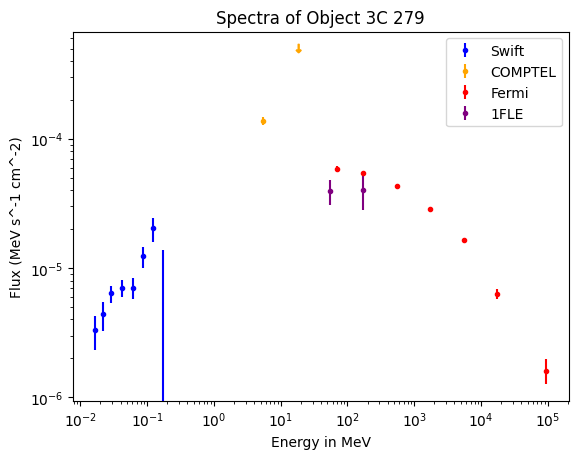

In [41]:

plt.errorbar(Bat_Energy_BandMeV, Obj_3C279_spectra_swift, Obj_3C279_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(COMPTEL_EnergyBand, Obj_3C279_COMPTEL_EnergyFlux, Obj_3C279_COMPTEL_EnergyFlux_err, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL')
plt.scatter(math.sqrt(300),Obj_3C279_COMPTEL_EnergyFlux_10_30MEV, marker = r'$\downarrow$', color = 'orange')
plt.errorbar(Fermi_Energy_BandMeV, Obj_3C279_spectra_fermi, Obj_3C279_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.errorbar(EBuckets, EF_FLE, yerr = EF_FLEe, fmt = 'o', markersize = 3, color = 'purple', label = '1FLE')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of Object 3C 279')

# 3C 454.3 

In [50]:
fermi_obj_name = table['ASSOC1']
objname_fermi = '3C 454.3                    ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J2253.9+1609,343.4963,16.1506,86.1185,-38.1849,0.0046,0.0046,-53.830,0.0074,0.0074,-53.830,699,,443.845,517.46,9.8347e-08,5.9638e-10,1.1148e-09,5.3423e-12,PLSuperExpCutoff,6.3231e-10,2.8152e-12,2.3872,0.0034,7.2007e-10,3.9488e-12,2.3149,0.0050,0.0999,0.0027,38.146,7.0141e-10,3.5839e-12,2.0142,0.0095,0.01991,0.00142,0.5184,0.0067,39.508,72486.00,2.5202414e-06 .. 6.3178913e-11,-9.9892794e-08 .. 1.5491015e-11,4.0201378e-10 .. 1.7561069e-12,20.126493 .. 13.044973,50905.2305,0.8069,0.2157,355.842,5.1103757e-06,2.8642487e-08,318230016.0,31560000.0,1.1215884e-06 .. 2.3332825e-06,-1.3649307e-08 .. 2.0764046e-08,149.57155 .. 214.46951,132456.5781,1.2604,0.1300,295.682,1.3344133e-05,8.290318e-08,310340000.0,5260000.0,3.1720895e-06 .. 3.2216678e-06,-4.0893774e-08 .. 4.4087955e-08,137.70451 .. 130.8758,3FGL J2254.0+1608,3FHL J2253.9+1608,J2254+1609,3EG J2254+1601,EGR J2253+1606,N,,FSRQ,,3C 454.3,,1.0000,0.9996,343.4906,16.1482,0.00000,0


In [51]:
Obj_3C4543_spectra_fermi = []

for gal in table[wg3]:
    Obj_3C4543_spectra_fermi.extend(gal['nuFnu_Band'])

#print(Obj_3C111_spectra_fermi)

Obj_3C4543_spectra_fermi = [i * (624151) for i in Obj_3C4543_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_3C4543_spectra_fermi)

Obj_3C4543_spectra_fermi_yerrmin = [9.945408667094008e-06, 3.249965206378238e-06, 1.297116714320647e-06, 1.0125479557778622e-06, 9.045272925008174e-07, 7.843460217252544e-07, 2.3366005750719595e-07]
Obj_3C4543_spectra_fermi_yerrmax = [9.945408667094008e-06, 3.249965206378238e-06, 1.297116714320647e-06, 1.0125479557778622e-06, 9.045272925008174e-07, 7.843460217252544e-07, 2.687499129454805e-07]
Obj_3C4543_spectra_fermi_yerr = [Obj_3C4543_spectra_fermi_yerrmin, Obj_3C4543_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[0.00025091730490653386, 0.0002374215940803559, 0.0001840810951458105, 0.00011872551349807747, 5.44828607308076e-05, 1.4361509971047223e-05, 1.096075859119785e-06]


In [52]:
obj_name = table1['COUNTERPART_NAME']
name = '3C 454.3'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
1171,SWIFT J2253.9+1608,343.485,16.149,61.98,3C 454.3,0.0,343.4906,16.1482,158.36,155.57,161.17,0.0,1.50,1.45,1.55,13.00,0.859,47.75,0.0,80,Beamed AGN,3.0 .. 22.5,0.000904141809 .. 0.0176009666,0.0224485956 .. 0.165065587


In [53]:
Obj_3C4543_spectra_swift = [] 
Obj_3C4543_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_3C4543_spectra_swift.extend(gal['Flux'])
    Obj_3C4543_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_3C4543_spectra_swift = [i * (1e-3) for i in Obj_3C4543_spectra_swift]
Obj_3C4543_spectra_swift_err = [i * (1e-3) for i in Obj_3C4543_spectra_swift_err]

print(Obj_3C4543_spectra_swift)
print(Obj_3C4543_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[2.24485956e-05, 2.2155009199999998e-05, 2.7347702500000003e-05, 2.69263834e-05, 3.55346203e-05, 4.73680757e-05, 6.72985762e-05, 0.000165065587]
[9.041418090000001e-07, 1.0656825e-06, 9.39523801e-07, 1.0069882300000001e-06, 1.23451569e-06, 2.2686785099999997e-06, 4.27514454e-06, 1.76009666e-05]


In [54]:
Obj_3C4543_COMPTEL_PhotonFlux_075_1MEV = 10.4 * (1e-5)
Obj_3C4543_COMPTEL_PhotonFlux_1_3MEV = 9.2 * (1e-5)
Obj_3C4543_COMPTEL_PhotonFlux_3_10MEV = 2.8 * (1e-5)
Obj_3C4543_COMPTEL_PhotonFlux_10_30MEV = 2.9 * (1e-5)

Obj_3C4543_COMPTEL_EnergyFlux_075_1MEV = math.sqrt(0.75) * Obj_3C4543_COMPTEL_PhotonFlux_075_1MEV
Obj_3C4543_COMPTEL_EnergyFlux_1_3MEV = math.sqrt(3) * Obj_3C4543_COMPTEL_PhotonFlux_1_3MEV
Obj_3C4543_COMPTEL_EnergyFlux_3_10MEV = math.sqrt(30) * Obj_3C4543_COMPTEL_PhotonFlux_3_10MEV
Obj_3C4543_COMPTEL_EnergyFlux_10_30MEV = math.sqrt(300) * Obj_3C4543_COMPTEL_PhotonFlux_10_30MEV

Obj_3C4543_COMPTEL_PhotonFlux_075_1MEV_err = 0 * (1e-5)
Obj_3C4543_COMPTEL_PhotonFlux_1_3MEV_err = 0 * (1e-5)
Obj_3C4543_COMPTEL_PhotonFlux_3_10MEV_err = 2.3 * (1e-5)
Obj_3C4543_COMPTEL_PhotonFlux_10_30MEV_err = 1 * (1e-5)

Obj_3C4543_COMPTEL_EnergyFlux_075_1MEV_err = math.sqrt(0.75) * Obj_3C4543_COMPTEL_PhotonFlux_075_1MEV_err
Obj_3C4543_COMPTEL_EnergyFlux_1_3MEV_err = math.sqrt(3) * Obj_3C4543_COMPTEL_PhotonFlux_1_3MEV_err
Obj_3C4543_COMPTEL_EnergyFlux_3_10MEV_err = math.sqrt(30) * Obj_3C4543_COMPTEL_PhotonFlux_3_10MEV_err
Obj_3C4543_COMPTEL_EnergyFlux_10_30MEV_err = math.sqrt(300) * Obj_3C4543_COMPTEL_PhotonFlux_10_30MEV_err

COMPTEL_3C4543_EnergyBand = [math.sqrt(30), math.sqrt(300)]
COMPTEL_3C4543_EnergyBand_UL = [math.sqrt(.75), math.sqrt(3)]

Obj_3C4543_COMPTEL_EnergyFlux = [Obj_3C4543_COMPTEL_EnergyFlux_3_10MEV, Obj_3C4543_COMPTEL_EnergyFlux_10_30MEV]
Obj_3C4543_COMPTEL_EnergyFlux_UL = [Obj_3C4543_COMPTEL_EnergyFlux_075_1MEV, Obj_3C4543_COMPTEL_EnergyFlux_1_3MEV]
Obj_3C4543_COMPTEL_EnergyFlux_err = [Obj_3C4543_COMPTEL_EnergyFlux_3_10MEV_err, Obj_3C4543_COMPTEL_EnergyFlux_10_30MEV_err]

In [55]:
FLE_obj_name = bright_FLE['AssocCOMP']
obj_name_COMP = '3C_454.3               '

wg9 = (obj_name_COMP == FLE_obj_name)
print(wg9)

bright_FLE[wg9]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

Name,RAdeg,DEdeg,GLON,GLAT,ePos,Signi,EF30-100,e_EF30-100,EF100-300,e_EF100-300,F30-100,e_F30-100,F100-300,e_F100-300,Class1,z,Assoc1,Assoc3FGL,AssocCOMP
,deg,deg,deg,deg,deg,,mW / m2,mW / m2,mW / m2,mW / m2,1/cm2/s,1/cm2/s,1/cm2/s,1/cm2/s,,,,,
bytes15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,bytes18,bytes18,bytes23
1FLE J2254+1617,343.562622,16.287817,86.282646,-38.105961,0.240857,99.997,2.732470e-10,5.550470e-11,2.506050e-10,5.881840e-11,3.279760e-06,6.662180e-07,1.039920e-06,2.238510e-07,fsrq,0.859000,3FGL J2254.0+1608,3FGL J2254.0+1608,3C_454.3


In [56]:
EFBucket30_100 = []
EFBucket30_100e = []
EFBucket100_300 = []
EFBucket100_300e = []

for gal in bright_FLE[wg9]:
    EFBucket30_100.append(gal['EF30-100'])
    EFBucket30_100e.append(gal['e_EF30-100'])
    EFBucket100_300.append(gal['EF100-300'])
    EFBucket100_300e.append(gal['e_EF100-300'])

print(EFBucket30_100)
print(EFBucket30_100e)
print(EFBucket100_300)
print(EFBucket100_300e)

EF_FLE = EFBucket30_100 + EFBucket100_300
EF_FLEe = EFBucket30_100e + EFBucket100_300e

EF_FLE = [624151 * x for x in EF_FLE]
EF_FLEe = [624151 * x for x in EF_FLEe]


print(EF_FLE)
print(EF_FLEe)

EBucket30_100 = math.sqrt(30*100)
EBucket100_300 = math.sqrt(100*300)

EBuckets = [EBucket30_100, EBucket100_300]
print(EBuckets)

[2.73247e-10]
[5.55047e-11]
[2.50605e-10]
[5.88184e-11]
[0.000170547388297, 0.00015641536135499999]
[3.4643314009700004e-05, 3.67115631784e-05]
[54.772255750516614, 173.20508075688772]


Text(0.5, 1.0, 'Spectra of Object 3C 454.3')

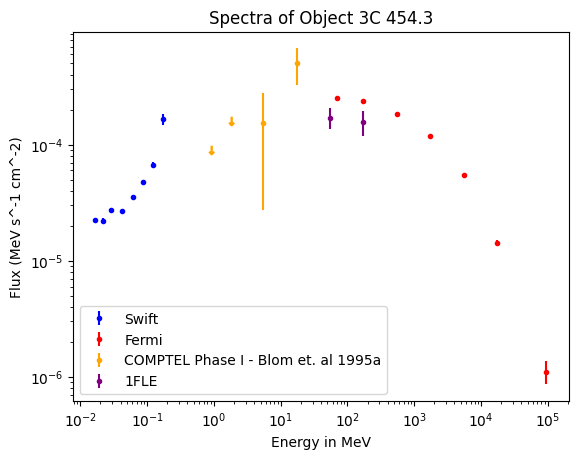

In [57]:
plt.errorbar(Bat_Energy_BandMeV, Obj_3C4543_spectra_swift, yerr = Obj_3C4543_spectra_swift_err, fmt = 'o', color= 'blue', markersize = 3, label = 'Swift')
plt.errorbar(Fermi_Energy_BandMeV, Obj_3C4543_spectra_fermi, yerr = Obj_3C4543_spectra_fermi_yerr, fmt = 'o', color = 'red', markersize = 3, label = 'Fermi')
plt.errorbar(COMPTEL_3C4543_EnergyBand, Obj_3C4543_COMPTEL_EnergyFlux, yerr = Obj_3C4543_COMPTEL_EnergyFlux_err, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL Phase I - Blom et. al 1995a') 
plt.scatter(COMPTEL_3C4543_EnergyBand_UL, Obj_3C4543_COMPTEL_EnergyFlux_UL, marker = r'$\downarrow$', color= 'orange')
plt.errorbar(EBuckets, EF_FLE, yerr = EF_FLEe, fmt = 'o', markersize = 3, color = 'purple', label = '1FLE')
plt.legend(loc='lower left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of Object 3C 454.3')

# CTA 102

In [58]:
fermi_obj_name = table['ASSOC1']
objname_fermi = 'CTA 102                     ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J2232.6+1143,338.1525,11.7306,77.4385,-38.5832,0.0060,0.0060,-26.470,0.0097,0.0097,-26.470,1215,,199.458,414.07,1.8789e-08,2.4464e-10,2.2012e-10,2.1896e-12,LogParabola,2.1136e-10,1.9238e-12,2.3785,0.0072,2.3241e-10,2.4354e-12,2.2607,0.0088,0.1007,0.0060,16.128,2.2348e-10,2.2148e-12,2.1027,0.0184,0.00392,0.00026,0.6667,--,16.437,22015.18,4.8138196e-07 .. 5.2458315e-12,-2.7125306e-08 .. 5.5841386e-12,7.7409475e-11 .. 1.8268446e-13,8.519442 .. 2.0327704,14315.2090,0.9575,0.2560,183.847,1.2822404e-06,1.3493233e-08,476029728.0,31559456.0,1.1389902e-07 .. 1.2822404e-06,-4.8152313e-09 .. 1.3493233e-08,35.372093 .. 183.8471,25276.4258,1.1533,0.1191,142.882,2.77533e-06,3.9012978e-08,478660000.0,5260000.0,1.1657867e-07 .. 1.3792907e-06,-1.0844816e-08 .. 2.9507543e-08,16.230228 .. 83.1392,3FGL J2232.5+1143,3FHL J2232.7+1143,J2232+1132,3EG J2232+1147,,N,,FSRQ,,CTA 102,,1.0000,0.9997,338.1517,11.7308,0.00000,256


In [59]:
Obj_CTA102_spectra_fermi = []

for gal in table[wg3]:
    Obj_CTA102_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_CTA102_spectra_fermi = [i * (624151) for i in Obj_CTA102_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_CTA102_spectra_fermi)

Obj_CTA102_spectra_fermi_yerrmin = [2.722504650424021e-06, 1.0823877911311439e-06, 4.775767090413373e-07, 4.068548890921839e-07, 4.0222246522271694e-07, 3.858378596826662e-07, 7.536086707732456e-08]
Obj_CTA102_spectra_fermi_yerrmax = [2.722504650424021e-06, 1.0823877911311439e-06, 4.775767090413373e-07, 4.068548890921839e-07, 4.0222246522271694e-07, 4.1604140812664687e-07, 1.2137608803638588e-07]
Obj_CTA102_spectra_fermi_yerr = [Obj_CTA102_spectra_fermi_yerrmin, Obj_CTA102_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[4.831520102076964e-05, 4.533557304246122e-05, 3.5892719719158445e-05, 2.2862905185008775e-05, 1.0841413796548391e-05, 3.4062155090685588e-06, 1.1402268907477323e-07]


In [60]:
obj_name = table1['COUNTERPART_NAME']
name = '[HB89] 2230+114'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
1155,SWIFT J2232.5+1141,338.178,11.713,10.78,[HB89] 2230+114,0.0,338.1517,11.7308,30.05,26.91,33.41,0.0,1.49,1.24,1.76,0.30,1.037,47.23,0.0,80,Beamed AGN,3.0 .. 22.5,0.000940803497 .. 0.0187821295,0.00351800676 .. 0.00908446591


In [61]:
Obj_CTA102_spectra_swift = [] 
Obj_CTA102_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_CTA102_spectra_swift.extend(gal['Flux'])
    Obj_CTA102_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_CTA102_spectra_swift = [i * (1e-3) for i in Obj_CTA102_spectra_swift]
Obj_CTA102_spectra_swift_err = [i * (1e-3) for i in Obj_CTA102_spectra_swift_err]

print(Obj_CTA102_spectra_swift)
print(Obj_CTA102_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[3.5180067600000004e-06, 4.6133888e-06, 5.478855220000001e-06, 4.8082047099999995e-06, 7.1730921000000005e-06, 1.01435725e-05, 9.32974368e-06, 9.084465910000001e-06]
[9.40803497e-07, 1.08162302e-06, 9.70055466e-07, 1.07329641e-06, 1.2855744e-06, 2.37393193e-06, 4.2825453000000005e-06, 1.87821295e-05]


In [62]:
Obj_CTA102_COMPTEL_PhotonFlux_075_1MEV = 7.8 * (1e-5)
Obj_CTA102_COMPTEL_PhotonFlux_1_3MEV = 12.2 * (1e-5)
Obj_CTA102_COMPTEL_PhotonFlux_3_10MEV =  6.4 * (1e-5)
Obj_CTA102_COMPTEL_PhotonFlux_10_30MEV = 1.9 * (1e-5)

Obj_CTA102_COMPTEL_EnergyFlux_075_1MEV = math.sqrt(0.75) * Obj_CTA102_COMPTEL_PhotonFlux_075_1MEV
Obj_CTA102_COMPTEL_EnergyFlux_1_3MEV = math.sqrt(3) * Obj_CTA102_COMPTEL_PhotonFlux_1_3MEV
Obj_CTA102_COMPTEL_EnergyFlux_3_10MEV = math.sqrt(30) * Obj_CTA102_COMPTEL_PhotonFlux_3_10MEV
Obj_CTA102_COMPTEL_EnergyFlux_10_30MEV = math.sqrt(300) * Obj_CTA102_COMPTEL_PhotonFlux_10_30MEV

Obj_CTA102_COMPTEL_PhotonFlux_075_1MEV_err = 0 * (1e-5)
Obj_CTA102_COMPTEL_PhotonFlux_1_3MEV_err = 0 * (1e-5)
Obj_CTA102_COMPTEL_PhotonFlux_3_10MEV_err = 0 * (1e-5)
Obj_CTA102_COMPTEL_PhotonFlux_10_30MEV_err = .9 * (1e-5)

Obj_CTA102_COMPTEL_EnergyFlux_075_1MEV_err = math.sqrt(0.75) * Obj_CTA102_COMPTEL_PhotonFlux_075_1MEV_err
Obj_CTA102_COMPTEL_EnergyFlux_1_3MEV_err = math.sqrt(3) * Obj_CTA102_COMPTEL_PhotonFlux_1_3MEV_err
Obj_CTA102_COMPTEL_EnergyFlux_3_10MEV_err = math.sqrt(30) * Obj_CTA102_COMPTEL_PhotonFlux_3_10MEV_err
Obj_CTA102_COMPTEL_EnergyFlux_10_30MEV_err = math.sqrt(300) * Obj_CTA102_COMPTEL_PhotonFlux_10_30MEV_err

COMPTEL_CTA102_EnergyBand = [math.sqrt(300)]
COMTPEL_CTA102_EnergyBand_UL = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30)]

Obj_CTA102_COMPTEL_EnergyFlux = [Obj_CTA102_COMPTEL_EnergyFlux_10_30MEV]
Obj_CTA102_COMPTEL_EnergyFlux_err = [Obj_CTA102_COMPTEL_EnergyFlux_10_30MEV_err]
Obj_CTA102_COMPTEL_EnergyFlux_UL = [Obj_CTA102_COMPTEL_EnergyFlux_075_1MEV, Obj_CTA102_COMPTEL_EnergyFlux_1_3MEV,Obj_CTA102_COMPTEL_EnergyFlux_10_30MEV]

In [66]:
FLE_obj_name = bright_FLE['AssocCOMP']
obj_name_COMP = 'CTA_102_(PKS_2230+114) '

wg9 = (obj_name_COMP == FLE_obj_name)

bright_FLE[wg9]

Name,RAdeg,DEdeg,GLON,GLAT,ePos,Signi,EF30-100,e_EF30-100,EF100-300,e_EF100-300,F30-100,e_F30-100,F100-300,e_F100-300,Class1,z,Assoc1,Assoc3FGL,AssocCOMP
,deg,deg,deg,deg,deg,,mW / m2,mW / m2,mW / m2,mW / m2,1/cm2/s,1/cm2/s,1/cm2/s,1/cm2/s,,,,,
bytes15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,bytes18,bytes18,bytes23
1FLE J2231+1132,337.938690,11.538370,77.075043,-38.593109,0.243086,30.071,6.882840e-11,1.526120e-11,7.432160e-11,2.209390e-11,8.261400e-07,1.831790e-07,2.619470e-07,8.408490e-08,fsrq,1.037000,3FGL J2232.5+1143,3FGL J2232.5+1143,CTA_102_(PKS_2230+114)


In [64]:
EFBucket30_100 = []
EFBucket30_100e = []
EFBucket100_300 = []
EFBucket100_300e = []

for gal in bright_FLE[wg9]:
    EFBucket30_100.append(gal['EF30-100'])
    EFBucket30_100e.append(gal['e_EF30-100'])
    EFBucket100_300.append(gal['EF100-300'])
    EFBucket100_300e.append(gal['e_EF100-300'])

print(EFBucket30_100)
print(EFBucket30_100e)
print(EFBucket100_300)
print(EFBucket100_300e)

EF_FLE = EFBucket30_100 + EFBucket100_300
EF_FLEe = EFBucket30_100e + EFBucket100_300e

EF_FLE = [624151 * x for x in EF_FLE]
EF_FLEe = [624151 * x for x in EF_FLEe]


print(EF_FLE)
print(EF_FLEe)

EBucket30_100 = math.sqrt(30*100)
EBucket100_300 = math.sqrt(100*300)

EBuckets = [EBucket30_100, EBucket100_300]
print(EBuckets)

[6.88284e-11]
[1.52612e-11]
[7.43216e-11]
[2.20939e-11]
[4.29593146884e-05, 4.63879009616e-05]
[9.525293241199998e-06, 1.37899297789e-05]
[54.772255750516614, 173.20508075688772]


Text(0.5, 1.0, 'Spectra of Object CTA 102')

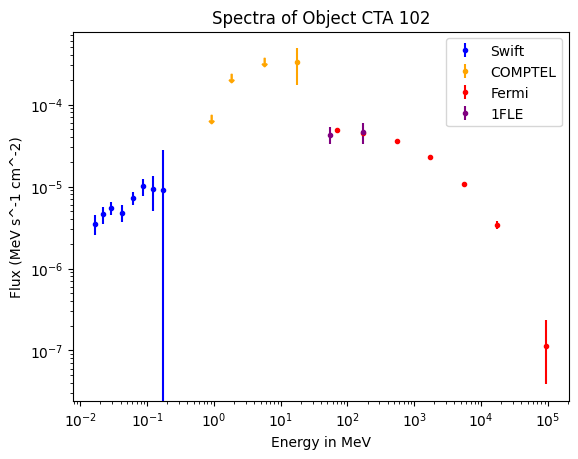

In [65]:
plt.errorbar(Bat_Energy_BandMeV, Obj_CTA102_spectra_swift, Obj_CTA102_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(COMPTEL_CTA102_EnergyBand, Obj_CTA102_COMPTEL_EnergyFlux, yerr = Obj_CTA102_COMPTEL_EnergyFlux_err, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL')
plt.scatter(COMTPEL_CTA102_EnergyBand_UL, Obj_CTA102_COMPTEL_EnergyFlux_UL, marker = r'$\downarrow$', color = 'orange')
plt.errorbar(Fermi_Energy_BandMeV, Obj_CTA102_spectra_fermi, Obj_CTA102_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.errorbar(EBuckets, EF_FLE, yerr = EF_FLEe, fmt = 'o', markersize = 3, color = 'purple', label = '1FLE')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of Object CTA 102')

# Centaurus A

In [67]:
fermi_obj_name = table['ASSOC1']
objname_fermi = 'Cen A                       ' 

wg7 = (fermi_obj_name == objname_fermi)
print(wg7)
table[wg7]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J1325.5-4300,201.3813,-43.0165,309.5287,19.4182,0.0105,0.0099,52.570,0.0170,0.0161,52.570,348,,63.457,681.73,3.5581e-09,1.1354e-10,6.3842e-11,1.5818e-12,PowerLaw,1.6191e-11,3.6314e-13,2.6492,0.0230,1.5264e-11,3.8875e-13,2.6662,0.0187,-0.0512,0.0089,4.148,1.5995e-11,3.6033e-13,2.6978,0.0243,-0.00050,0.00009,0.6667,--,2.917,7846.10,2.114724e-07 .. 3.2325198e-11,-8.719589e-08 .. 1.1165019e-11,3.3024476e-11 .. 1.3599346e-12,2.4491396 .. 7.7377543,8.2470,0.0202,0.0401,--,--,--,--,--,1.5569073e-07 .. 1.691461e-07,-8.575757e-09 .. 7.956436e-09,23.462181 .. 27.932505,71.9110,0.0840,0.0248,--,--,--,--,--,1.2857228e-07 .. 1.7853088e-07,-1.8577662e-08 .. 1.7248075e-08,8.372939 .. 13.303789,3FGL J1325.4-4301,3FHL J1325.5-4300,J1324-4348,3EG J1324-4314,,P,Centaurus A,RDG,,Cen A,CenA Lobes field,1.0000,1.0000,201.3651,-43.0191,0.00000,512


In [68]:
Obj_CENA_spectra_fermi = []

for gal in table[wg7]:
    Obj_CENA_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_CENA_spectra_fermi = [i * (624151) for i in Obj_CENA_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_CENA_spectra_fermi)

Obj_CENA_spectra_fermi_yerrmin = [8.499001840639973e-06, 1.083222575492572e-06, 2.784467189589836e-07, 1.8675361491713523e-07, 1.865759796262185e-07, 2.9574306723554634e-07, 2.4716116858155895e-07]
Obj_CENA_spectra_fermi_yerrmax = [8.780601349165675e-06, 1.083222575492572e-06, 2.784467189589836e-07, 1.8675361491713523e-07, 1.865759796262185e-07, 3.2508960153026416e-07, 2.931743594230098e-07]
Obj_CENA_spectra_fermi_yerr = [Obj_CENA_spectra_fermi_yerrmin, Obj_CENA_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[2.0612259417376183e-05, 2.0628062935585528e-05, 8.476477821092905e-06, 3.844446441030654e-06, 2.1366500622043913e-06, 1.9285455481190487e-06, 8.488045566578577e-07]


In [69]:
obj_name = table1['COUNTERPART_NAME']
name = 'Cen A'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
671,SWIFT J1325.4-4301,201.365,-43.019,604.78,Cen A,0.0,201.3651,-43.0191,1346.34,1343.29,1350.03,0.0,1.88,1.88,1.89,2.20,0.0018,42.98,0.0,80,Beamed AGN,3.0 .. 22.5,0.00108032196 .. 0.0191586595,0.274805427 .. 0.350963622


In [70]:
Obj_CENA_spectra_swift = []
Obj_CENA_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_CENA_spectra_swift.extend(gal['Flux'])
    Obj_CENA_spectra_swift_err.extend(gal['Flux_err'])

print(Bat_Energy_BandMeV)

Obj_CENA_spectra_swift = [i * (1e-3) for i in Obj_CENA_spectra_swift]
Obj_CENA_spectra_swift_err = [i * (1e-3) for i in Obj_CENA_spectra_swift_err]

print(Obj_CENA_spectra_swift)
print(Obj_CENA_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[0.000274805427, 0.00028771191800000003, 0.000295605808, 0.00031094369300000004, 0.000323952645, 0.00033354711500000004, 0.000345252812, 0.000350963622]
[1.08032196e-06, 1.19100325e-06, 9.89822089e-07, 1.14119088e-06, 1.4067135100000001e-06, 2.3959358199999997e-06, 4.36010631e-06, 1.9158659500000003e-05]


In [71]:
Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_p1 = 11.3 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_p1 = 14.2 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p1 = 5.5 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_10_30MEV_p1 = 1.4 * (1e-5)

Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_err_p1 = 2.9 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_err_p1 = 4.1 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_err_p1 = 0 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_10_30MEV_err_p1 = 0 * (1e-5)

Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_p1 = math.sqrt(0.75) * Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_p1
Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_p1 = math.sqrt(3) * Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_p1
Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_p1 = math.sqrt(3*10) * Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p1
Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_p1 = math.sqrt(30*10) * Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p1

Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_err_p1 = math.sqrt(0.75) * Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_err_p1 
Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_err_p1 = math.sqrt(3) * Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_err_p1
Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_err_p1 = 0 
Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_err_p1 = 0

COMPTEL_CENA_EnergyBand1 = [math.sqrt(0.75), math.sqrt(3)]
COMPTEL_CENA_EnergyBand1_UL = [math.sqrt(3*10), math.sqrt(30*10)]

Obj_CENA_COMPTEL_EnergyFlux1 = [Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_p1, Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_p1]
Obj_CENA_COMPTEL_EnergyFlux1_UL = [Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_p1, Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_p1]
Obj_CENA_COMPTEL_EnergyFlux_err1 = [Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_err_p1, Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_err_p1]


In [72]:
Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_p2 = 4.4 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_p2 = 13.9 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p2 = 7 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_10_30MEV_p2 = 2.7 * (1e-5)

Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_err_p2 = 0 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_err_p2 = 0 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_err_p2 = 1.7 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_10_30MEV_err_p2 = 0 * (1e-5)

Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_p2 = math.sqrt(0.75) * Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_p2
Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_p2 = math.sqrt(3) * Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_p2
Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_p2 = math.sqrt(3*10) * Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p2
Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_p2 = math.sqrt(30*10) * Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p2

Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_err_p2 = 0 
Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_err_p2 = 0
Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_err_p2 = Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_err_p2 * math.sqrt(3*10)
Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_err_p2 = 0

COMPTEL_CENA_EnergyBand2 = [math.sqrt(30)]
COMPTEL_CENA_EnergyBand2_UL = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30*10)]

Obj_CENA_COMPTEL_EnergyFlux2 = [Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_p2]
Obj_CENA_COMPTEL_EnergyFlux2_UL = [Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_p2, Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_p2, Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_p2]
Obj_CENA_COMPTEL_EnergyFlux_err2 = [Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_err_p2]

In [73]:
Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_p3 = 24.1 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_p3 = 14.9 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p3 = 3.9 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_10_30MEV_p3 = 1.2 * (1e-5)

Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_err_p3 = 6.2 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_err_p3 = 0 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_err_p3 = 0 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_10_30MEV_err_p3 = 0 * (1e-5)

Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_p3 = math.sqrt(0.75) * Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_p3
Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_p3 = math.sqrt(3) * Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_p3
Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_p3 = math.sqrt(3*10) * Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p3
Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_p3 = math.sqrt(30*10) * Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p3

Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_err_p3 = Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_err_p3 * math.sqrt(0.75)
Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_err_p3 = 0
Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_err_p3 = 0
Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_err_p3 = 0

Obj_CENA_COMPTEL_EnergyFlux3 = [Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_p3]
Obj_CENA_COMPTEL_EnergyFlux_err3 = [Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_err_p3]
Obj_CENA_COMPTEL_EnergyFlux3_UL = [Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_p3, Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_p3, Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_p3]

COMPTEL_CENA_EnergyBand3 = [math.sqrt(0.75)]
COMPTEL_CENA_EnergyBand3_UL = [math.sqrt(3), math.sqrt(30), math.sqrt(30*10)]

print(Obj_CENA_COMPTEL_EnergyFlux3_UL)

[0.00025807557032776274, 0.00021361179742701477, 0.0006754998149518622]


In [74]:
Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_p1to4 = 9.1 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_p1to4 = 6.4 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p1to4 = 2.1 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_10_30MEV_p1to4 = 0.6 * (1e-5)

Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_err_p1to4 = 3.0 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_err_p1to4 = 2.5 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_err_p1to4 = 2.1 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_10_30MEV_err_p1to4 = 0 * (1e-5)

Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_p1to4 = math.sqrt(0.75) * Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_p1to4
Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_p1to4 = math.sqrt(3) * Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_p1to4
Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_p1to4 = math.sqrt(3*10) * Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p1to4
Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_p1to4 = math.sqrt(30*10) * Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p1to4

Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_err_p1to4 = Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_err_p1to4 * math.sqrt(0.75)
Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_err_p1to4 = Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_err_p1to4 * math.sqrt(3)
Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_err_p1to4 = Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_err_p1to4 * math.sqrt(30)
Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_err_p1to4 = 0

Obj_CENA_COMPTEL_EnergyFlux1to4 = [Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_p1to4, Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_p1to4, Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_p1to4]
Obj_CENA_COMPTEL_EnergyFlux_err1to4 = [Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_err_p1to4, Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_err_p1to4, Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_err_p1to4]
Obj_CENA_COMPTEL_EnergyFlux1to4_UL = [Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_p1to4]

COMPTEL_CENA_EnergyBand1to4_UL = [math.sqrt(30*10)] 
COMPTEL_CENA_EnergyBand1to4 = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30)]

In [75]:
FLE_obj_name = bright_FLE['AssocCOMP']
obj_name_COMP = 'Centaurus_A            '

wg9 = (obj_name_COMP == FLE_obj_name)
#print(wg9)

bright_FLE[wg9]

Name,RAdeg,DEdeg,GLON,GLAT,ePos,Signi,EF30-100,e_EF30-100,EF100-300,e_EF100-300,F30-100,e_F30-100,F100-300,e_F100-300,Class1,z,Assoc1,Assoc3FGL,AssocCOMP
,deg,deg,deg,deg,deg,,mW / m2,mW / m2,mW / m2,mW / m2,1/cm2/s,1/cm2/s,1/cm2/s,1/cm2/s,,,,,
bytes15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,bytes18,bytes18,bytes23
1FLE J1324-4319,201.120453,-43.318058,309.285156,19.145691,0.245276,24.427,7.094940e-11,1.573150e-11,4.112710e-11,1.222600e-11,8.515980e-07,1.888240e-07,2.700190e-07,4.652980e-08,rdg,0.001800,3FGL J1325.4-4301,3FGL J1325.4-4301,Centaurus_A


In [76]:
EFBucket30_100 = []
EFBucket30_100e = []
EFBucket100_300 = []
EFBucket100_300e = []

for gal in bright_FLE[wg9]:
    EFBucket30_100.append(gal['EF30-100'])
    EFBucket30_100e.append(gal['e_EF30-100'])
    EFBucket100_300.append(gal['EF100-300'])
    EFBucket100_300e.append(gal['e_EF100-300'])

print(EFBucket30_100)
print(EFBucket30_100e)
print(EFBucket100_300)
print(EFBucket100_300e)

EF_FLE = EFBucket30_100 + EFBucket100_300
EF_FLEe = EFBucket30_100e + EFBucket100_300e

EF_FLE = [624151 * x for x in EF_FLE]
EF_FLEe = [624151 * x for x in EF_FLEe]


print(EF_FLE)
print(EF_FLEe)

EBucket30_100 = math.sqrt(30*100)
EBucket100_300 = math.sqrt(100*300)

EBuckets = [EBucket30_100, EBucket100_300]
print(EBuckets)

[7.09494e-11]
[1.57315e-11]
[4.11271e-11]
[1.2226e-11]
[4.42831389594e-05, 2.5669520592099998e-05]
[9.8188314565e-06, 7.630870126000001e-06]
[54.772255750516614, 173.20508075688772]


Text(0.5, 1.0, 'Spectra of Object Cen A')

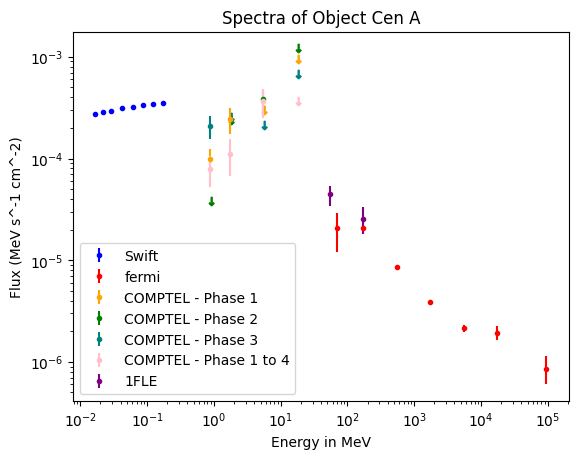

In [77]:
plt.errorbar(Bat_Energy_BandMeV, Obj_CENA_spectra_swift, yerr = Obj_CENA_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(Fermi_Energy_BandMeV, Obj_CENA_spectra_fermi, yerr = Obj_CENA_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'fermi')
plt.errorbar(COMPTEL_CENA_EnergyBand1, Obj_CENA_COMPTEL_EnergyFlux1, yerr = Obj_CENA_COMPTEL_EnergyFlux_err1, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL - Phase 1',)
plt.scatter(COMPTEL_CENA_EnergyBand1_UL, Obj_CENA_COMPTEL_EnergyFlux1_UL, marker = r'$\downarrow$', color = 'orange')
plt.errorbar(COMPTEL_CENA_EnergyBand2, Obj_CENA_COMPTEL_EnergyFlux2, yerr = Obj_CENA_COMPTEL_EnergyFlux_err2, fmt = 'o', markersize = 3, color = 'green', label = 'COMPTEL - Phase 2')
plt.scatter(COMPTEL_CENA_EnergyBand2_UL, Obj_CENA_COMPTEL_EnergyFlux2_UL, marker = r'$\downarrow$', color = 'green')
plt.errorbar(COMPTEL_CENA_EnergyBand3, Obj_CENA_COMPTEL_EnergyFlux3, yerr = Obj_CENA_COMPTEL_EnergyFlux_err3, fmt = 'o', markersize = 3, color = 'teal', label = 'COMPTEL - Phase 3')
plt.scatter(COMPTEL_CENA_EnergyBand3_UL, Obj_CENA_COMPTEL_EnergyFlux3_UL, marker = r'$\downarrow$', color = 'teal')
plt.errorbar(COMPTEL_CENA_EnergyBand1to4, Obj_CENA_COMPTEL_EnergyFlux1to4, yerr = Obj_CENA_COMPTEL_EnergyFlux_err1to4, fmt = 'o', markersize = 3, color = 'pink', label = 'COMPTEL - Phase 1 to 4')
plt.scatter(COMPTEL_CENA_EnergyBand1to4_UL, Obj_CENA_COMPTEL_EnergyFlux1to4_UL, marker = r'$\downarrow$', color = 'pink')
plt.errorbar(EBuckets, EF_FLE, yerr = EF_FLEe, fmt = 'o', markersize = 3, color = 'purple', label = '1FLE')
plt.legend(loc='lower left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of Object Cen A')

# GRO J1224+2155

In [78]:
Obj_GROJ1224_COMPTEL_PhotonFlux_075_1MEV = 4.8 * (1e-5)
Obj_GROJ1224_COMPTEL_PhotonFlux_1_3MEV = 5.4 * (1e-5)
Obj_GROJ1224_COMPTEL_PhotonFlux_3_10MEV =  2.6 * (1e-5)
Obj_GROJ1224_COMPTEL_PhotonFlux_10_30MEV = 0.9 * (1e-5)

Obj_GROJ1224_COMPTEL_EnergyFlux_075_1MEV = math.sqrt(0.75) * Obj_GROJ1224_COMPTEL_PhotonFlux_075_1MEV
Obj_GROJ1224_COMPTEL_EnergyFlux_1_3MEV = math.sqrt(3) * Obj_GROJ1224_COMPTEL_PhotonFlux_1_3MEV
Obj_GROJ1224_COMPTEL_EnergyFlux_3_10MEV = math.sqrt(30) * Obj_GROJ1224_COMPTEL_PhotonFlux_3_10MEV
Obj_GROJ1224_COMPTEL_EnergyFlux_10_30MEV = math.sqrt(300) * Obj_GROJ1224_COMPTEL_PhotonFlux_10_30MEV

Obj_GROJ1224_COMPTEL_PhotonFlux_075_1MEV_err = 0 * (1e-5)
Obj_GROJ1224_COMPTEL_PhotonFlux_1_3MEV_err = 0 * (1e-5)
Obj_GROJ1224_COMPTEL_PhotonFlux_3_10MEV_err = 0.9 * (1e-5)
Obj_GROJ1224_COMPTEL_PhotonFlux_10_30MEV_err = 0 * (1e-5)

Obj_GROJ1224_COMPTEL_EnergyFlux_075_1MEV_err = math.sqrt(0.75) * Obj_GROJ1224_COMPTEL_PhotonFlux_075_1MEV_err
Obj_GROJ1224_COMPTEL_EnergyFlux_1_3MEV_err = math.sqrt(3) * Obj_GROJ1224_COMPTEL_PhotonFlux_1_3MEV_err
Obj_GROJ1224_COMPTEL_EnergyFlux_3_10MEV_err = math.sqrt(30) * Obj_GROJ1224_COMPTEL_PhotonFlux_3_10MEV_err
Obj_GROJ1224_COMPTEL_EnergyFlux_10_30MEV_err = math.sqrt(300) * Obj_GROJ1224_COMPTEL_PhotonFlux_10_30MEV_err

COMPTEL_GROJ1224_EnergyBand = [math.sqrt(30)]
COMTPEL_GROJ1224_EnergyBand_UL = [math.sqrt(0.75), math.sqrt(3), math.sqrt(300)]

COMPTEL_GROJ1224_EnergyFlux = [Obj_GROJ1224_COMPTEL_EnergyFlux_3_10MEV]
COMPTEL_GROJ1224_EnergyFlux_err = [Obj_GROJ1224_COMPTEL_PhotonFlux_3_10MEV_err]
COMPTEL_GROJ1224_EnergyFlux_UL = [Obj_GROJ1224_COMPTEL_EnergyFlux_075_1MEV, Obj_GROJ1224_COMPTEL_EnergyFlux_1_3MEV, Obj_GROJ1224_COMPTEL_EnergyFlux_10_30MEV]

In [79]:
fermi_obj_name = table['ASSOC1']
objname_fermi = '4C +21.35                   ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J1224.9+2122,186.2277,21.3814,255.0679,81.6616,0.0055,0.0055,-83.110,0.0089,0.0089,-83.110,1068,,211.243,393.68,1.9832e-08,2.4006e-10,2.3198e-10,2.2976e-12,LogParabola,2.3269e-10,1.9988e-12,2.3335,0.0068,2.4309e-10,2.3355e-12,2.2722,0.0090,0.0450,0.0045,7.277,2.3681e-10,2.1202e-12,2.2324,0.0133,0.00128,0.00015,0.6667,--,6.939,24063.52,5.168021e-07 .. 1.0360074e-10,-2.2967862e-08 .. 1.9310217e-11,8.240524e-11 .. 4.2031556e-12,12.617417 .. 17.562609,17566.5957,0.9943,0.2658,202.662,1.3178145e-06,1.2597564e-08,286670016.0,31560000.0,7.767332e-08 .. 5.7892958e-08,-3.902095e-09 .. 4.0574033e-09,30.362185 .. 21.345629,31860.0586,1.2400,0.1280,145.815,2.5350862e-06,3.3761104e-08,299820000.0,5260000.0,5.619648e-08 .. 8.0303174e-08,-7.561023e-09 .. 1.1468526e-08,10.523777 .. 10.363925,3FGL J1224.9+2122,3FHL J1224.9+2122,,3EG J1224+2118,,P,4C +21.35,FSRQ,,4C +21.35,,1.0000,0.9990,186.2269,21.3796,0.00000,0


In [80]:
Obj_GROJ1224_spectra_fermi = []

for gal in table[wg3]:
    Obj_GROJ1224_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_GROJ1224_spectra_fermi = [i * (624151) for i in Obj_GROJ1224_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_GROJ1224_spectra_fermi)

Obj_GROJ1224_spectra_fermi_yerrmin = [2.285813630340059e-06, 9.577348479655702e-07, 4.3924044177919876e-07, 3.9363899262444615e-07, 4.433676032107115e-07, 5.649715804076968e-07, 4.252033627380231e-07]
Obj_GROJ1224_spectra_fermi_yerrmax = [2.285813630340059e-06, 9.577348479655702e-07, 4.3924044177919876e-07, 3.9363899262444615e-07, 4.433676032107115e-07, 5.649715804076968e-07, 4.889781540594177e-07]
Obj_GROJ1224_spectra_fermi_yerr = [Obj_GROJ1224_spectra_fermi_yerrmin, Obj_GROJ1224_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[5.1433314419264964e-05, 4.4278036597705794e-05, 3.4013783613721926e-05, 2.2914534053349034e-05, 1.3601667807233361e-05, 6.8625624717278885e-06, 2.623403782562716e-06]


In [81]:
obj_name = table1['COUNTERPART_NAME']
name = 'PG 1222+216'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
614,SWIFT J1224.9+2122,186.221,21.401,12.60,PG 1222+216,0.0,186.2269,21.3796,24.50,21.63,27.16,0.0,1.70,1.45,1.96,1.80,0.432,46.22,0.0,80,Beamed AGN,3.0 .. 22.5,0.000757230446 .. 0.016293589,0.00400736462 .. 0.0504963249


In [82]:
Obj_GROJ1224_spectra_swift = [] 
Obj_GROJ1224_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_GROJ1224_spectra_swift.extend(gal['Flux'])
    Obj_GROJ1224_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_GROJ1224_spectra_swift = [i * (1e-3) for i in Obj_GROJ1224_spectra_swift]
Obj_GROJ1224_spectra_swift_err = [i * (1e-3) for i in Obj_GROJ1224_spectra_swift_err]

print(Obj_GROJ1224_spectra_swift)
print(Obj_GROJ1224_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[4.007364620000001e-06, 5.61628398e-06, 4.02160501e-06, 5.17058698e-06, 5.57197491e-06, 5.61379129e-06, 1.0977961099999999e-05, 5.04963249e-05]
[7.572304459999999e-07, 9.01977241e-07, 7.638644889999999e-07, 8.84956447e-07, 1.0694153600000001e-06, 1.97383342e-06, 3.64640518e-06, 1.6293589000000003e-05]


In [83]:
FLE_obj_name = bright_FLE['AssocCOMP']
obj_name_COMP = 'GROJ1224+2155          '

wg9 = (obj_name_COMP == FLE_obj_name)
#print(wg9)

bright_FLE[wg9]

Name,RAdeg,DEdeg,GLON,GLAT,ePos,Signi,EF30-100,e_EF30-100,EF100-300,e_EF100-300,F30-100,e_F30-100,F100-300,e_F100-300,Class1,z,Assoc1,Assoc3FGL,AssocCOMP
,deg,deg,deg,deg,deg,,mW / m2,mW / m2,mW / m2,mW / m2,1/cm2/s,1/cm2/s,1/cm2/s,1/cm2/s,,,,,
bytes15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,bytes18,bytes18,bytes23
1FLE J1224+2118,186.245590,21.313829,255.477493,81.625549,0.243811,28.172,5.635250e-11,1.249500e-11,4.976590e-11,1.479410e-11,6.763930e-07,1.499760e-07,2.144660e-07,5.630340e-08,fsrq,0.435000,3FGL J1224.9+2122,3FGL J1224.9+2122,GROJ1224+2155


In [84]:
EFBucket30_100 = []
EFBucket30_100e = []
EFBucket100_300 = []
EFBucket100_300e = []

for gal in bright_FLE[wg9]:
    EFBucket30_100.append(gal['EF30-100'])
    EFBucket30_100e.append(gal['e_EF30-100'])
    EFBucket100_300.append(gal['EF100-300'])
    EFBucket100_300e.append(gal['e_EF100-300'])

print(EFBucket30_100)
print(EFBucket30_100e)
print(EFBucket100_300)
print(EFBucket100_300e)

EF_FLE = EFBucket30_100 + EFBucket100_300
EF_FLEe = EFBucket30_100e + EFBucket100_300e

EF_FLE = [624151 * x for x in EF_FLE]
EF_FLEe = [624151 * x for x in EF_FLEe]


print(EF_FLE)
print(EF_FLEe)

EBucket30_100 = math.sqrt(30*100)
EBucket100_300 = math.sqrt(100*300)

EBuckets = [EBucket30_100, EBucket100_300]
print(EBuckets)

[5.63525e-11]
[1.2495e-11]
[4.97659e-11]
[1.47941e-11]
[3.51724692275e-05, 3.10614362509e-05]
[7.798766745e-06, 9.2337523091e-06]
[54.772255750516614, 173.20508075688772]


Text(0.5, 1.0, 'GRO J1224+2155')

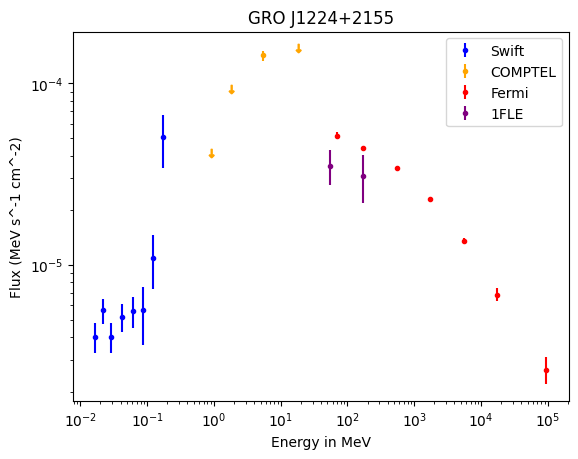

In [85]:
plt.errorbar(Bat_Energy_BandMeV, Obj_GROJ1224_spectra_swift, Obj_GROJ1224_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(COMPTEL_GROJ1224_EnergyBand, COMPTEL_GROJ1224_EnergyFlux, yerr = COMPTEL_GROJ1224_EnergyFlux_err, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL')
plt.scatter(COMTPEL_GROJ1224_EnergyBand_UL, COMPTEL_GROJ1224_EnergyFlux_UL, marker = r'$\downarrow$', color = 'orange')
plt.errorbar(Fermi_Energy_BandMeV, Obj_GROJ1224_spectra_fermi, Obj_GROJ1224_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.errorbar(EBuckets, EF_FLE, yerr = EF_FLEe, fmt = 'o', markersize = 3, color = 'purple', label = '1FLE')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('GRO J1224+2155')

# PKS 0528+134

In [86]:
Obj_PKS0528_COMPTEL_PhotonFlux_075_1MEV1 = 8.7 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_1_3MEV1 = 5.8 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV1 = 4.3  * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_10_30MEV1 = 2.0 * (1e-5)

Obj_PKS0528_COMPTEL_EnergyFlux_075_1MEV1 = math.sqrt(0.75) * Obj_PKS0528_COMPTEL_PhotonFlux_075_1MEV1
Obj_PKS0528_COMPTEL_EnergyFlux_1_3MEV1 = math.sqrt(3) * Obj_PKS0528_COMPTEL_PhotonFlux_1_3MEV1
Obj_PKS0528_COMPTEL_EnergyFlux_3_10MEV1 = math.sqrt(30) * Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV1
Obj_PKS0528_COMPTEL_EnergyFlux_10_30MEV1 = math.sqrt(300) * Obj_PKS0528_COMPTEL_PhotonFlux_10_30MEV1

Obj_PKS0528_COMPTEL_PhotonFlux_075_1MEV_err1 = 0 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_1_3MEV_err1 = 3.4 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV_err1 = 1.4 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_10_30MEV_err1 = 0.5 * (1e-5)

Obj_PKS0528_COMPTEL_EnergyFlux_075_1MEV_err1 = math.sqrt(0.75) * Obj_PKS0528_COMPTEL_PhotonFlux_075_1MEV_err1
Obj_PKS0528_COMPTEL_EnergyFlux_1_3MEV_err1 = math.sqrt(3) * Obj_PKS0528_COMPTEL_PhotonFlux_1_3MEV_err1
Obj_PKS0528_COMPTEL_EnergyFlux_3_10MEV_err1 = math.sqrt(30) * Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV_err1
Obj_PKS0528_COMPTEL_EnergyFlux_10_30MEV_err1 = math.sqrt(300) * Obj_PKS0528_COMPTEL_PhotonFlux_10_30MEV_err1

COMPTEL_PKS0528_EnergyBand_UL1 = [math.sqrt(0.75)]
COMPTEL_PKS0528_EnergyBand1 = [math.sqrt(3), math.sqrt(30), math.sqrt(300)]

COMPTEL_PKS0528_EnergyFlux_UL1 = [Obj_PKS0528_COMPTEL_EnergyFlux_075_1MEV1]
COMPTEL_PKS0528_EnergyFlux_err1 = [Obj_PKS0528_COMPTEL_PhotonFlux_1_3MEV_err1, Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV_err1, Obj_PKS0528_COMPTEL_PhotonFlux_10_30MEV_err1]
COMPTEL_PKS0528_EnergyFlux1 = [Obj_PKS0528_COMPTEL_EnergyFlux_1_3MEV1, Obj_PKS0528_COMPTEL_EnergyFlux_3_10MEV1, Obj_PKS0528_COMPTEL_EnergyFlux_10_30MEV1]

In [87]:
Obj_PKS0528_COMPTEL_PhotonFlux_075_1MEV2 = 4.2 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_1_3MEV2 = 8.5 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV2 = 2.3  * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_10_30MEV2 = 1.3 * (1e-5)

Obj_PKS0528_COMPTEL_EnergyFlux_075_1MEV2 = math.sqrt(0.75) * Obj_PKS0528_COMPTEL_PhotonFlux_075_1MEV2
Obj_PKS0528_COMPTEL_EnergyFlux_1_3MEV2 = math.sqrt(3) * Obj_PKS0528_COMPTEL_PhotonFlux_1_3MEV2
Obj_PKS0528_COMPTEL_EnergyFlux_3_10MEV2 = math.sqrt(30) * Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV2
Obj_PKS0528_COMPTEL_EnergyFlux_10_30MEV2 = math.sqrt(300) * Obj_PKS0528_COMPTEL_PhotonFlux_10_30MEV2

Obj_PKS0528_COMPTEL_PhotonFlux_075_1MEV_err2 = 3.4 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_1_3MEV_err2 = 2.7 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV_err2 = 1.0 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_10_30MEV_err2 = 0.4 * (1e-5)

Obj_PKS0528_COMPTEL_EnergyFlux_075_1MEV_err2 = math.sqrt(0.75) * Obj_PKS0528_COMPTEL_PhotonFlux_075_1MEV_err2
Obj_PKS0528_COMPTEL_EnergyFlux_1_3MEV_err2 = math.sqrt(3) * Obj_PKS0528_COMPTEL_PhotonFlux_1_3MEV_err2
Obj_PKS0528_COMPTEL_EnergyFlux_3_10MEV_err2 = math.sqrt(30) * Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV_err2
Obj_PKS0528_COMPTEL_EnergyFlux_10_30MEV_err2 = math.sqrt(300) * Obj_PKS0528_COMPTEL_PhotonFlux_10_30MEV_err2

COMPTEL_PKS0528_EnergyBand2 = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30), math.sqrt(300)]

COMPTEL_PKS0528_EnergyFlux_err2 = [Obj_PKS0528_COMPTEL_EnergyFlux_075_1MEV_err2, Obj_PKS0528_COMPTEL_EnergyFlux_1_3MEV_err2, Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV_err2, Obj_PKS0528_COMPTEL_EnergyFlux_10_30MEV_err2]
COMPTEL_PKS0528_EnergyFlux2 = [Obj_PKS0528_COMPTEL_EnergyFlux_075_1MEV2, Obj_PKS0528_COMPTEL_EnergyFlux_1_3MEV2, Obj_PKS0528_COMPTEL_EnergyFlux_3_10MEV2, Obj_PKS0528_COMPTEL_EnergyFlux_10_30MEV2]

In [88]:
fermi_obj_name = table['ASSOC1']
objname_fermi = 'PKS 0528+134                ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J0530.9+1332,82.7364,13.5402,191.3612,-11.0065,0.0228,0.0210,23.730,0.0369,0.0341,23.730,858,,26.917,736.41,2.0537e-09,1.1899e-10,2.5775e-11,1.8933e-12,LogParabola,6.7134e-12,3.1248e-13,2.5757,0.0343,8.5092e-12,4.5934e-13,2.5016,0.0596,0.2437,0.0506,6.706,8.2811e-12,4.5359e-13,1.8863,0.1573,0.00999,0.00232,0.6667,--,6.185,2915.51,6.924727e-08 .. 1.5326091e-12,-6.138056e-08 .. 6.1407264e-12,1.1380634e-11 .. 4.3069206e-14,1.1384275 .. 0.61632246,402.3596,1.0224,0.2774,23.655,1.4356816e-07,7.96768e-09,349790016.0,31560000.0,8.202372e-08 .. 1.1339679e-08,-6.2535883e-09 .. 5.37027e-09,16.38329 .. 2.3393593,727.5315,1.2304,0.1341,16.631,2.4005791e-07,1.9505062e-08,242073712.0,5032582.5,2.4005791e-07 .. 2.1390296e-08,-1.9505062e-08 .. 1.40120076e-08,16.631462 .. 1.7198346,3FGL J0530.8+1330,,J0531+1334,3EG J0530+1323,EGR J0530+1331,N,,FSRQ,,PKS 0528+134,,1.0000,0.9940,82.7351,13.5320,0.00000,0


In [89]:
Obj_PKS0528_spectra_fermi = []

for gal in table[wg3]:
    Obj_PKS0528_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_PKS0528_spectra_fermi = [i * (624151) for i in Obj_PKS0528_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_PKS0528_spectra_fermi)

Obj_PKS0528_spectra_fermi_yerrmin = [6.296284291882083e-06, 1.0615924309767914e-06, 3.2865782252241045e-07, 1.9082087810246687e-07, 1.3832316571226577e-07, 7.076770759351277e-08, 0.0]
Obj_PKS0528_spectra_fermi_yerrmax = [3.7410890932460493e-06, 1.1193401948888073e-06, 3.2865783774831906e-07, 1.9082088787913888e-07, 1.4969799659662582e-07, 1.079433411725557e-07, 1.0770723003563384e-07]
Obj_PKS0528_spectra_fermi_yerr = [Obj_PKS0528_spectra_fermi_yerrmin, Obj_PKS0528_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[7.103234267861677e-06, 6.244257400893002e-06, 5.057512902748203e-06, 2.364447393817231e-06, 8.285422234700348e-07, 1.2287258077412562e-07, 2.688168814501561e-08]


In [90]:
obj_name = table1['COUNTERPART_NAME']
name = 'PKS 0528+134'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
282,SWIFT J0530.8+1333,82.742,13.572,4.74,PKS 0528+134,0.0,82.7351,13.5320,18.24,14.84,22.96,0.0,1.25,0.75,1.73,2.30,2.06,47.75,0.0,80,Beamed AGN,3.0 .. 22.5,0.00106426375 .. 0.0216995981,0.000233800194 .. -0.0252453517


In [91]:
Obj_PKS0528_spectra_swift = [] 
Obj_PKS0528_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_PKS0528_spectra_swift.extend(gal['Flux'])
    Obj_PKS0528_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_PKS0528_spectra_swift = [i * (1e-3) for i in Obj_PKS0528_spectra_swift]
Obj_PKS0528_spectra_swift_err = [i * (1e-3) for i in Obj_PKS0528_spectra_swift_err]

print(Obj_PKS0528_spectra_swift)
print(Obj_PKS0528_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[2.33800194e-07, 2.2295804200000003e-06, 3.1682041e-06, 2.8319202800000002e-06, 3.69375967e-06, 1.11239264e-05, -2.7793936900000002e-06, -2.52453517e-05]
[1.0642637500000001e-06, 1.25197286e-06, 1.0831869400000001e-06, 1.2324110100000002e-06, 1.42104377e-06, 2.5704552000000003e-06, 4.938037600000001e-06, 2.1699598099999997e-05]


Text(0.5, 1.0, 'PKS 0528+134')

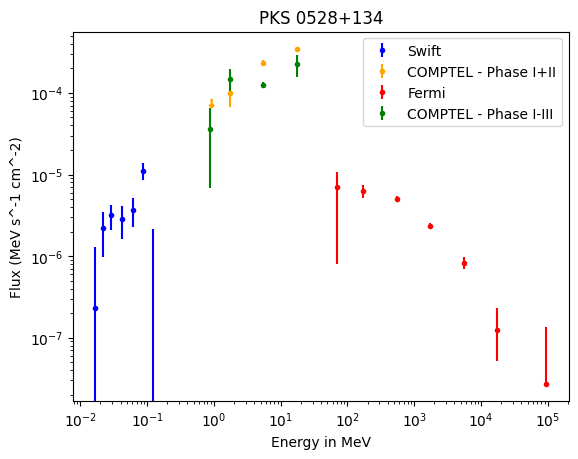

In [92]:
plt.errorbar(Bat_Energy_BandMeV, Obj_PKS0528_spectra_swift, Obj_PKS0528_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(COMPTEL_PKS0528_EnergyBand1, COMPTEL_PKS0528_EnergyFlux1, yerr = COMPTEL_PKS0528_EnergyFlux_err1, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL - Phase I+II')
plt.scatter(COMPTEL_PKS0528_EnergyBand_UL1, COMPTEL_PKS0528_EnergyFlux_UL1, marker = r'$\downarrow$', color = 'orange')
plt.errorbar(Fermi_Energy_BandMeV, Obj_PKS0528_spectra_fermi, Obj_PKS0528_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.errorbar(COMPTEL_PKS0528_EnergyBand2, COMPTEL_PKS0528_EnergyFlux2, yerr = COMPTEL_PKS0528_EnergyFlux_err2, fmt = 'o', markersize = 3, color = 'green', label = 'COMPTEL - Phase I-III')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('PKS 0528+134')

# PKS 1522-297

In [96]:
Obj_PKS1622_COMPTEL_PhotonFlux_075_1MEV = 22 * (1e-5)
Obj_PKS1622_COMPTEL_PhotonFlux_1_3MEV = 13.5 * (1e-5)
Obj_PKS1622_COMPTEL_PhotonFlux_3_10MEV = 6.1 * (1e-5)
Obj_PKS1622_COMPTEL_PhotonFlux_10_30MEV = 3.3 * (1e-5)

Obj_PKS1622_COMPTEL_EnergyFlux_075_1MEV = math.sqrt(0.75) * Obj_PKS1622_COMPTEL_PhotonFlux_075_1MEV
Obj_PKS1622_COMPTEL_EnergyFlux_1_3MEV = math.sqrt(3) * Obj_PKS1622_COMPTEL_PhotonFlux_1_3MEV
Obj_PKS1622_COMPTEL_EnergyFlux_3_10MEV = math.sqrt(30) * Obj_PKS1622_COMPTEL_PhotonFlux_3_10MEV
Obj_PKS1622_COMPTEL_EnergyFlux_10_30MEV = math.sqrt(300) * Obj_PKS1622_COMPTEL_PhotonFlux_10_30MEV

Obj_PKS1622_COMPTEL_PhotonFlux_075_1MEV_err = 0 * (1e-5)
Obj_PKS1622_COMPTEL_PhotonFlux_1_3MEV_err = 0 * (1e-5)
Obj_PKS1622_COMPTEL_PhotonFlux_3_10MEV_err = 0 * (1e-5)
Obj_PKS1622_COMPTEL_PhotonFlux_10_30MEV_err = 0.7 * (1e-5)

Obj_PKS1622_COMPTEL_EnergyFlux_075_1MEV_err = math.sqrt(0.75) * Obj_PKS1622_COMPTEL_PhotonFlux_075_1MEV_err
Obj_PKS1622_COMPTEL_EnergyFlux_1_3MEV_err = math.sqrt(3) * Obj_PKS1622_COMPTEL_PhotonFlux_1_3MEV_err
Obj_PKS1622_COMPTEL_EnergyFlux_3_10MEV_err = math.sqrt(30) * Obj_PKS1622_COMPTEL_PhotonFlux_3_10MEV_err
Obj_PKS1622_COMPTEL_EnergyFlux_10_30MEV_err = math.sqrt(300) * Obj_PKS1622_COMPTEL_PhotonFlux_10_30MEV_err

COMPTEL_PKS1622_EnergyBand = [math.sqrt(300)]
COMTPEL_PKS1622_EnergyBand_UL = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30)]

COMPTEL_PKS1622_EnergyFlux = [Obj_PKS1622_COMPTEL_EnergyFlux_10_30MEV]
COMPTEL_PKS1622_EnergyFlux_err = [Obj_PKS1622_COMPTEL_PhotonFlux_10_30MEV_err]
COMPTEL_PKS1622_EnergyFlux_UL = [Obj_PKS1622_COMPTEL_EnergyFlux_075_1MEV, Obj_PKS1622_COMPTEL_EnergyFlux_1_3MEV, Obj_PKS1622_COMPTEL_EnergyFlux_3_10MEV]

In [97]:
fermi_obj_name = table['ASSOC1']
objname_fermi = 'PKS B1622-297               ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J1626.0-2950,246.5150,-29.8486,348.8178,13.3280,0.0143,0.0127,19.920,0.0232,0.0206,19.920,779,,45.057,598.93,3.0748e-09,1.2023e-10,4.2333e-11,1.5458e-12,LogParabola,1.7104e-11,5.0611e-13,2.5494,0.0241,1.9341e-11,6.6618e-13,2.4726,0.0335,0.1161,0.0216,5.426,1.8521e-11,6.3552e-13,2.2691,0.0736,0.00379,0.00102,0.6667,--,4.453,4738.03,9.7610105e-08 .. 1.1663472e-11,-4.0526075e-08 .. 7.798689e-12,1.5651775e-11 .. 3.8308058e-13,2.441363 .. 3.5950463,376.0275,0.6034,0.1641,29.995,1.4543681e-07,6.3467414e-09,444470016.0,31560000.0,4.042333e-08 .. 1.3231323e-07,-5.795035e-09 .. 7.1861996e-09,7.9631777 .. 23.653406,853.9994,0.7805,0.0850,19.434,2.7664547e-07,1.9243222e-08,473400000.0,5260000.0,5.6773064e-08 .. 3.498312e-08,-1.401848e-08 .. 1.1062381e-08,4.769775 .. 3.6438313,3FGL J1626.0-2951,3FHL J1625.9-2951,J1626-2943,3EG J1625-2955,EGR J1625-2958,N,,FSRQ,,PKS B1622-297,,1.0000,0.9997,246.5251,-29.8575,0.00000,0


In [98]:
Obj_PKS1622_spectra_fermi = []

for gal in table[wg3]:
    Obj_PKS1622_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_PKS1622_spectra_fermi = [i * (624151) for i in Obj_PKS1622_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_PKS1622_spectra_fermi)

Obj_PKS1622_spectra_fermi_yerrmin = [4.0559541089370266e-06, 8.235729015831092e-07, 2.985576899612987e-07, 2.0026428446191422e-07, 1.5460918944930476e-07, 1.4770174811495028e-07, 1.1203249711063562e-07]
Obj_PKS1622_spectra_fermi_yerrmax = [3.680159308743977e-06, 8.235729015831092e-07, 2.985576899612987e-07, 2.0026428446191422e-07, 1.6428682776903564e-07, 1.757598175152386e-07, 1.5987242161328717e-07]
Obj_PKS1622_spectra_fermi_yerr = [Obj_PKS1622_spectra_fermi_yerrmin, Obj_PKS1622_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[9.769071027353887e-06, 1.0431291060973916e-05, 6.990192988392749e-06, 3.68120170646637e-06, 1.2996609930512708e-06, 5.417520764025726e-07, 2.3910012983269766e-07]


In [99]:
obj_name = table1['COUNTERPART_NAME']
name = 'PKS 1622-29'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
808,SWIFT J1626.5-2951,246.554,-29.855,5.07,PKS 1622-29,0.0,246.5251,-29.8575,15.54,12.64,19.09,0.0,1.32,0.66,1.99,1.00,0.815,46.69,0.0,80,Beamed AGN,3.0 .. 22.5,0.00126115826 .. 0.0177975725,0.0023802123 .. -0.0170777645


In [100]:
Obj_PKS1622_spectra_swift = [] 
Obj_PKS1622_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_PKS1622_spectra_swift.extend(gal['Flux'])
    Obj_PKS1622_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_PKS1622_spectra_swift = [i * (1e-3) for i in Obj_PKS1622_spectra_swift]
Obj_PKS1622_spectra_swift_err = [i * (1e-3) for i in Obj_PKS1622_spectra_swift_err]

print(Obj_PKS1622_spectra_swift)
print(Obj_PKS1622_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[2.3802123000000002e-06, 2.70619732e-06, 1.36569946e-06, 2.72666733e-06, 2.56664376e-06, 6.614626850000001e-06, 8.68858397e-06, -1.7077764499999997e-05]
[1.2611582599999999e-06, 1.1796074699999999e-06, 9.57568176e-07, 1.01660134e-06, 1.23042322e-06, 2.24051159e-06, 4.0323315199999995e-06, 1.7797572500000002e-05]


In [101]:
FLE_obj_name = bright_FLE['AssocCOMP']
obj_name_COMP = 'PKS_1622-297           '

wg9 = (obj_name_COMP == FLE_obj_name)
#print(wg9)

bright_FLE[wg9]

Name,RAdeg,DEdeg,GLON,GLAT,ePos,Signi,EF30-100,e_EF30-100,EF100-300,e_EF100-300,F30-100,e_F30-100,F100-300,e_F100-300,Class1,z,Assoc1,Assoc3FGL,AssocCOMP
,deg,deg,deg,deg,deg,,mW / m2,mW / m2,mW / m2,mW / m2,1/cm2/s,1/cm2/s,1/cm2/s,1/cm2/s,,,,,
bytes15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,bytes18,bytes18,bytes23
1FLE J1625-2926,246.427643,-29.434141,349.079071,13.664161,0.246676,4.228,1.206180e-11,3.992080e-12,1.368360e-11,3.884660e-12,1.447770e-07,4.791650e-08,4.590490e-08,1.478420e-08,fsrq,0.815000,3FGL J1626.0-2951,3FGL J1626.0-2951,PKS_1622-297


In [102]:
EFBucket30_100 = []
EFBucket30_100e = []
EFBucket100_300 = []
EFBucket100_300e = []

for gal in bright_FLE[wg9]:
    EFBucket30_100.append(gal['EF30-100'])
    EFBucket30_100e.append(gal['e_EF30-100'])
    EFBucket100_300.append(gal['EF100-300'])
    EFBucket100_300e.append(gal['e_EF100-300'])

print(EFBucket30_100)
print(EFBucket30_100e)
print(EFBucket100_300)
print(EFBucket100_300e)

EF_FLE = EFBucket30_100 + EFBucket100_300
EF_FLEe = EFBucket30_100e + EFBucket100_300e

EF_FLE = [624151 * x for x in EF_FLE]
EF_FLEe = [624151 * x for x in EF_FLEe]


print(EF_FLE)
print(EF_FLEe)

EBucket30_100 = math.sqrt(30*100)
EBucket100_300 = math.sqrt(100*300)

EBuckets = [EBucket30_100, EBucket100_300]
print(EBuckets)

[1.20618e-11]
[3.99208e-12]
[1.36836e-11]
[3.88466e-12]
[7.5283845318e-06, 8.5406326236e-06]
[2.49166072408e-06, 2.42461442366e-06]
[54.772255750516614, 173.20508075688772]


Text(0.5, 1.0, 'Spectra of Object PKS 1622-297')

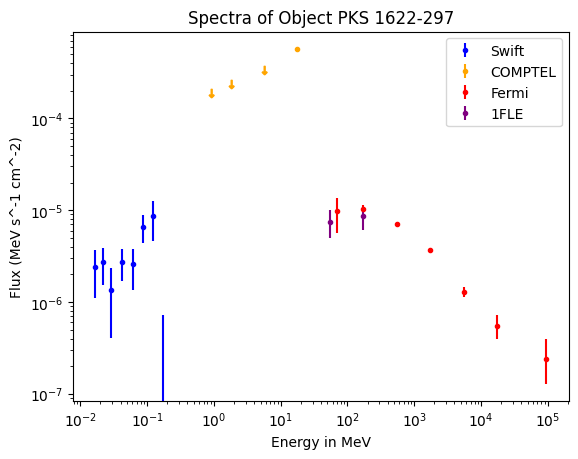

In [103]:
plt.errorbar(Bat_Energy_BandMeV, Obj_PKS1622_spectra_swift, Obj_PKS1622_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(COMPTEL_PKS1622_EnergyBand, COMPTEL_PKS1622_EnergyFlux, yerr = COMPTEL_PKS1622_EnergyFlux_err, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL')
plt.scatter(COMTPEL_PKS1622_EnergyBand_UL, COMPTEL_PKS1622_EnergyFlux_UL, marker = r'$\downarrow$', color = 'orange')
plt.errorbar(Fermi_Energy_BandMeV, Obj_PKS1622_spectra_fermi, Obj_PKS1622_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.errorbar(EBuckets, EF_FLE, yerr = EF_FLEe, fmt = 'o', markersize = 3, color = 'purple', label = '1FLE')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of Object PKS 1622-297')